In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from astropy.utils.data import get_pkg_data_filename
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning) 
from scipy.stats import chisquare
from fermipy.gtanalysis import GTAnalysis
from astropy.table import Table
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
def powerlaw(p_0,p_1,x_s,x):
    F = p_0*(x/x_s)**p_1
    return F

In [3]:
def PLSuperExpCutoff(Prefactor,Index1,Index2,Expfactor,Scale,E):
    F = Prefactor*((E/Scale)**(Index1)) * np.exp(-Expfactor*(E**Index2))
    return F

In [4]:
def LogParabola(p_0,p_1,p_2,x_s,x):
    F = p_0 * (x/x_s)**(p_1 - p_2*np.log(x/x_s))
    return F

In [5]:
np.log(np.e)

1.0

In [6]:
c = np.load('Crab_5_bin_6/fit0.npy', allow_pickle=True).flat[0]

In [7]:
gta = GTAnalysis('new_data/config_5_6.yaml',logging={'verbosity': 3},fileio={'outdir': 'Crab_5_bin_6'})
gta.load_roi('fit0')

2023-03-24 21:36:48 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version v1.2 
ScienceTools version 2.2.0
2023-03-24 21:36:48 INFO    GTAnalysis.load_roi(): Loading ROI file: /home/user/fermi/Crab_nebula/Crab_nebula_Analysis/Crab_5_bin_6/fit0.npy
2023-03-24 21:36:48 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2023-03-24 21:37:09 INFO    GTAnalysis.load_roi(): Finished Loading ROI


In [8]:
gta.print_roi()

2023-03-24 21:37:09 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J0534.5+2200   PointSource    PLSuperExpCuto    0.003  56971.25    337392.8
4FGL J0534.5+2201s  PointSource    PowerLaw          0.005   3940.21     39284.0
4FGL J0534.5+2201i  RadialGaussian LogParabola       0.006  25021.47    152925.8
4FGL J0526.3+2246   PointSource    PowerLaw          2.037    116.88      4375.0
4FGL J0544.4+2238   PointSource    PowerLaw          2.375     82.03      3969.0
isodiff             ConstantValue  FileFunction      -----    975.51     37408.6
galdiff             MapCubeFunctio PowerLaw          -----  74066.84    187764.9



In [9]:
gta.print_params()

2023-03-24 21:37:09 INFO    GTAnalysis.print_params(): 
 idx parname                  value     error       min       max     scale free
--------------------------------------------------------------------------------
4FGL J0526.3+2246
   0 Prefactor                 1.04    0.0518     1e-05     1e+03     1e-14    *
   1 Index                     2.97    0.0157         0         5        -1    *
   2 Scale                  4.4e+03         0   4.4e+03   4.4e+03         1     
4FGL J0534.5+2200
   3 Prefactor                 1.24    0.0011     1e-05     1e+03     1e-10    *
   4 Index1                     1.9  0.000612         0         5        -1    *
   5 Scale                 1.46e+03         0  1.46e+03  1.46e+03         1     
   6 Expfactor                  0.5  8.97e-06      -0.5       0.5      0.01    *
   7 Index2                   0.667         0         0         2         1     
4FGL J0534.5+2201i
   8 norm                     0.769   0.00141     1e-05     1e+03     1e-12    

In [10]:
print(gta.roi['4FGL J0534.5+2201s'])

Name           : 4FGL J0534.5+2201s
Associations   : ['4FGL J0534.5+2201s', 'Crab Nebula', 'J0534+2205', 'Crab']
RA/DEC         :     83.633/    22.020
GLON/GLAT      :    184.553/    -5.781
TS             : 3940.21
Npred          : 39284.01
Flux           : 3.601e-07 +/- 2.84e-09
EnergyFlux     : 4.987e-05 +/- 4.15e-07
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
b'Prefactor'   :  2.878e-07 +/-  1.663e-09
b'Index'       :     -4.567 +/-  -0.005142
b'Scale'       :      50.55 +/-        nan


In [11]:
gta.roi['4FGL J0534.5+2201s']

4FGL J0526.3+2246

In [10]:
Prefactor2246=1.04*1e-14
Index2246=-2.97
Scale2246=4.4e+03

In [11]:
powerlaw(Prefactor2246,Index2246,Scale2246,10000)

9.08004055936802e-16

In [12]:
E = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['energies'])
dnde = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde'])
print(len(dnde))
print(len(E))

50
50


In [13]:
E = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['energies'])
dnde_hi = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde'])

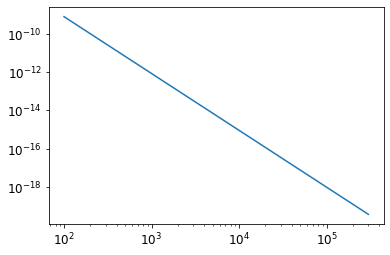

In [14]:
plt.loglog(E, powerlaw(Prefactor2246,Index2246,Scale2246,E), label='dnde_data')
plt.show()

In [15]:
sed2246 = gta.sed('4FGL J0526.3+2246',outfile='sed2246.fits')

2022-05-03 14:59:51 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0526.3+2246
2022-05-03 15:00:10 INFO    GTAnalysis._make_sed(): Fitting SED
2022-05-03 15:00:10 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2200     : ['Index1', 'Expfactor']
2022-05-03 15:00:10 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201s    : ['Index']
2022-05-03 15:00:10 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-05-03 15:00:10 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0526.3+2246     : ['Index']
2022-05-03 15:00:10 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0544.4+2238     : ['Index']
2022-05-03 15:00:25 INFO    GTAnalysis.sed(): Finished SED
2022-05-03 15:00:33 INFO    GTAnalysis.sed(): Execution time: 41.64 s


In [16]:
sed2246

{'name': '4FGL J0526.3+2246',
 'loge_min': array([2.     , 2.16558, 2.33115, 2.49673, 2.66231, 2.82789, 2.99346,
        3.15904, 3.32462, 3.49019, 3.65577, 3.82135, 3.98693, 4.1525 ,
        4.31808, 4.48366, 4.64924, 4.81481, 4.98039, 5.14597, 5.31154]),
 'loge_max': array([2.16558, 2.33115, 2.49673, 2.66231, 2.82789, 2.99346, 3.15904,
        3.32462, 3.49019, 3.65577, 3.82135, 3.98693, 4.1525 , 4.31808,
        4.48366, 4.64924, 4.81481, 4.98039, 5.14597, 5.31154, 5.47712]),
 'loge_ctr': array([2.08279 , 2.248365, 2.41394 , 2.57952 , 2.7451  , 2.910675,
        3.07625 , 3.24183 , 3.407405, 3.57298 , 3.73856 , 3.90414 ,
        4.069715, 4.23529 , 4.40087 , 4.56645 , 4.732025, 4.8976  ,
        5.06318 , 5.228755, 5.39433 ]),
 'loge_ref': array([2.08279 , 2.248365, 2.41394 , 2.57952 , 2.7451  , 2.910675,
        3.07625 , 3.24183 , 3.407405, 3.57298 , 3.73856 , 3.90414 ,
        4.069715, 4.23529 , 4.40087 , 4.56645 , 4.732025, 4.8976  ,
        5.06318 , 5.228755, 5.39433 ]),
 'e_

In [17]:
sed2246_tab = Table.read('Crab_5_bin_6/4fgl_j0526.3+2246_sed.fits')

In [18]:
sed2246_tab

e_min,e_ref,e_max,ref_dnde_e_min,ref_dnde_e_max,ref_dnde,ref_flux,ref_eflux,ref_npred,dnde,dnde_err,dnde_errp,dnde_errn,dnde_ul,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,norm,norm_err,norm_errp,norm_errn,norm_ul,ts,loglike,norm_scan [20],dloglike_scan [20]
MeV,MeV,MeV,ph / (cm2 MeV s),ph / (cm2 MeV s),ph / (cm2 MeV s),ph / (cm2 s),MeV / (cm2 s),,ph / (cm2 MeV s),ph / (cm2 MeV s),ph / (cm2 MeV s),ph / (cm2 MeV s),ph / (cm2 MeV s),MeV / (cm2 s),MeV / (cm2 s),MeV / (cm2 s),MeV / (cm2 s),MeV / (cm2 s),,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
100.0,121.00128989595494,146.4131215648491,1e-11,4.664874883106917e-12,6.8299889334514334e-12,3.1700149844740216e-10,3.812620396979536e-08,20.42459036326681,5.660658466594054e-10,8.908119184473512e-11,8.946482702624088e-11,8.869755666322934e-11,7.11560920414349e-10,8.287946762065285e-06,1.3042655370704862e-06,1.3098824595171218e-06,1.2986486146238505e-06,1.0418185554142212e-05,82.87946762065282,13.042655370704862,13.09882459517122,12.986486146238505,104.18185554142212,40.43144937074976,-204075.67958425984,0.0 .. 113.29166801947981,-20.21572468537488 .. -2.702390178834321
146.4131215648491,177.1597260319376,214.36308571434947,4.664874883106917e-12,2.176205983185727e-12,3.1861777463647742e-12,2.1650093118770305e-10,3.812390138470258e-08,23.723395857781398,1.9302341119784633e-10,3.1163885232751724e-11,3.1375989790759085e-11,3.095178067474437e-11,2.442932384991731e-10,6.0581494996025815e-06,9.78096255562256e-07,9.84753277702636e-07,9.714392334218762e-07,7.667282177772291e-06,60.58149499602582,9.780962555622558,9.847532777026357,9.714392334218761,76.6728217777229,38.6664499421604,-202400.500729374,0.0 .. 83.5275919720205,-19.3332249710802 .. -2.7016138139006216
214.36308571434947,259.38209877513435,313.8556852771122,2.176205983185727e-12,1.015172863143009e-12,1.4863462782069315e-12,1.4788063783977437e-10,3.812620396979538e-08,24.246403281827618,4.581933318853736e-11,1.0908525946650935e-11,1.0968563085837897e-11,1.0848488807463975e-11,6.386391456794474e-11,3.082682269962822e-06,7.339155152869588e-07,7.379547583669352e-07,7.298762722069825e-07,4.2967049808196515e-06,30.826822699628217,7.339155152869588,7.3795475836693525,7.298762722069824,42.96704980819651,17.81708509643795,-189075.54180876786,0.0 .. 48.09563077445844,-8.908542548218975 .. -2.7008904153772164
313.8556852771122,379.7694275970945,459.5259060229689,1.015172863143009e-12,4.735654391287548e-13,6.933619420806958e-13,1.0100231199174015e-10,3.812620396979548e-08,22.683864151477792,1.0055987804143326e-11,3.928512035888228e-12,3.934342696646234e-12,3.922681375130221e-12,1.6586166114470796e-11,1.450323012244733e-06,5.665889339266641e-07,5.674298599141086e-07,5.657480079392195e-07,2.392136791456668e-06,14.503230122447327,5.66588933926664,5.674298599141085,5.657480079392194,23.921367914566677,6.680611115065403,-167780.56310878263,0.0 .. 27.830638781639063,-3.3403055575327016 .. -2.7001291364140343
459.5259060229689,556.0322736938655,672.8062234073838,4.735654391287548e-13,2.2091235224992251e-13,3.2344467085144715e-13,6.898446731565929e-11,3.8126203969795386e-08,20.131608989356636,1.2317249312348308e-12,1.3917763832559104e-12,1.3917763832559104e-12,nan,3.5147836682154474e-12,3.8081472419761783e-07,4.3029813401845504e-07,4.3029813401845504e-07,nan,1.0866723074963665e-06,3.8081472419761777,4.302981340184549,4.302981340184549,nan,10.866723074963662,0.8080032058060169,-140024.82816000393,0.0 .. 13.80410730258349,-0.40400160290300846 .. -2.7060852880531456
672.8062234073838,814.0948361560708,985.0539118076568,2.2091235224992251e-13,1.0305759420619742e-13,1.5088636635995005e-13,4.7113977329687413e-11,3.8123901384702416e-08,16.917580487670378,9.610464249081983e-13,4.846925720296675e-13,4.899800943528661e-13,4.794050497064688e-13,1.776518997097509e-12,6.369

In [19]:
aa = np.array(sed2246['dnde_ul95'])
bb = np.array(0.2*sed2246['dnde_ul95'])
(aa-bb)*(100/bb)

array([400., 400., 400., 400., 400., 400., 400., 400., 400., 400., 400.,
       400., 400., 400., 400., 400., 400., 400., 400., 400., 400.])

In [20]:
aa

array([7.11560920e-10, 2.44293238e-10, 6.38639146e-11, 1.65861661e-11,
       3.51478367e-12, 1.77651900e-12, 6.10370519e-13, 1.99033091e-13,
       1.25501984e-13, 4.05656586e-14, 1.05902926e-14, 1.07990990e-14,
       4.27713712e-15, 2.38304582e-15, 3.57146553e-16, 9.02659891e-16,
       1.36849737e-16, 1.09470277e-16, 1.51866191e-16, 6.95698471e-17,
       2.66717726e-17])

In [21]:
bb

array([1.42312184e-10, 4.88586477e-11, 1.27727829e-11, 3.31723322e-12,
       7.02956734e-13, 3.55303799e-13, 1.22074104e-13, 3.98066182e-14,
       2.51003967e-14, 8.11313172e-15, 2.11805851e-15, 2.15981979e-15,
       8.55427423e-16, 4.76609163e-16, 7.14293106e-17, 1.80531978e-16,
       2.73699475e-17, 2.18940555e-17, 3.03732382e-17, 1.39139694e-17,
       5.33435452e-18])

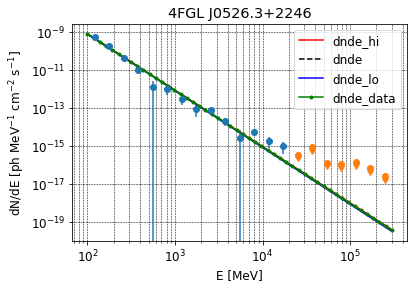

In [22]:
plt.loglog(E, dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, powerlaw(Prefactor2246,Index2246,Scale2246,E),'g.-', label='dnde_data')
plt.errorbar(sed2246['e_ctr'][:-7],
             1*sed2246['dnde'][:-7], 
             yerr=sed2246['dnde_err'][:-7], fmt ='o')
plt.errorbar(np.array(sed2246['e_ctr'][-7:]),
         sed2246['dnde_ul95'][-7:], yerr=0.2*sed2246['dnde_ul95'][-7:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()
plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

In [23]:
E

array([1.00000000e+02, 1.17750194e+02, 1.38651083e+02, 1.63261919e+02,
       1.92241227e+02, 2.26364419e+02, 2.66544543e+02, 3.13856718e+02,
       3.69566895e+02, 4.35165737e+02, 5.12408501e+02, 6.03362006e+02,
       7.10459935e+02, 8.36567954e+02, 9.85060392e+02, 1.15991053e+03,
       1.36579690e+03, 1.60822850e+03, 1.89369219e+03, 2.22982623e+03,
       2.62562472e+03, 3.09167821e+03, 3.64045711e+03, 4.28664532e+03,
       5.04753319e+03, 5.94348015e+03, 6.99845942e+03, 8.24069957e+03,
       9.70343977e+03, 1.14258192e+04, 1.34539243e+04, 1.58420220e+04,
       1.86540117e+04, 2.19651350e+04, 2.58639892e+04, 3.04548975e+04,
       3.58607011e+04, 4.22260452e+04, 4.97212503e+04, 5.85468688e+04,
       6.89390519e+04, 8.11758676e+04, 9.55847418e+04, 1.12551219e+05,
       1.32529279e+05, 1.56053484e+05, 1.83753281e+05, 2.16369845e+05,
       2.54775913e+05, 2.99999133e+05])

In [24]:
sed2246['e_ctr']

array([1.21001290e+02, 1.77159726e+02, 2.59382099e+02, 3.79769428e+02,
       5.56032274e+02, 8.14094836e+02, 1.19192794e+03, 1.74513890e+03,
       2.55508293e+03, 3.74093360e+03, 5.47721766e+03, 8.01936536e+03,
       1.17412680e+04, 1.71905590e+04, 2.51692341e+04, 3.68510613e+04,
       5.39541680e+04, 7.89950721e+04, 1.15659151e+05, 1.69338224e+05,
       2.47930525e+05])

In [25]:
dnde

array([8.06581653e-10, 4.96077963e-10, 3.05106550e-10, 1.87651970e-10,
       1.15412998e-10, 7.09833220e-11, 4.36574049e-11, 2.68509412e-11,
       1.65143357e-11, 1.01569358e-11, 6.24689637e-12, 3.84207553e-12,
       2.36302053e-12, 1.45334624e-12, 8.93862436e-13, 5.49758918e-13,
       3.38122350e-13, 2.07957925e-13, 1.27901922e-13, 7.86644785e-14,
       4.83816042e-14, 2.97565009e-14, 1.83013639e-14, 1.12560251e-14,
       6.92287753e-15, 4.25782929e-15, 2.61872468e-15, 1.61061388e-15,
       9.90587934e-16, 6.09248726e-16, 3.74710814e-16, 2.30461202e-16,
       1.41742281e-16, 8.71768184e-17, 5.36170124e-17, 3.29764733e-17,
       2.02817677e-17, 1.24740477e-17, 7.67200710e-18, 4.71857207e-18,
       2.90209877e-18, 1.78489957e-18, 1.09778017e-18, 6.75175970e-19,
       4.15258541e-19, 2.55399575e-19, 1.57080316e-19, 9.66102848e-20,
       5.94189480e-20, 3.65448812e-20])

In [26]:
sed2246['dnde'][:-7]

array([5.66065847e-10, 1.93023411e-10, 4.58193332e-11, 1.00559878e-11,
       1.23172493e-12, 9.61046425e-13, 3.15505430e-13, 9.35018991e-14,
       7.80268780e-14, 2.13892799e-14, 2.56441105e-15, 5.86777574e-15,
       1.92608737e-15, 1.01383865e-15])

In [27]:
sed2246['dnde_ul95'][-7:]

array([3.57146553e-16, 9.02659891e-16, 1.36849737e-16, 1.09470277e-16,
       1.51866191e-16, 6.95698471e-17, 2.66717726e-17])

In [28]:
0.99*sed2246['dnde_ul95'][-7:]

array([3.53575087e-16, 8.93633292e-16, 1.35481240e-16, 1.08375575e-16,
       1.50347529e-16, 6.88741486e-17, 2.64050549e-17])

In [29]:
E

array([1.00000000e+02, 1.17750194e+02, 1.38651083e+02, 1.63261919e+02,
       1.92241227e+02, 2.26364419e+02, 2.66544543e+02, 3.13856718e+02,
       3.69566895e+02, 4.35165737e+02, 5.12408501e+02, 6.03362006e+02,
       7.10459935e+02, 8.36567954e+02, 9.85060392e+02, 1.15991053e+03,
       1.36579690e+03, 1.60822850e+03, 1.89369219e+03, 2.22982623e+03,
       2.62562472e+03, 3.09167821e+03, 3.64045711e+03, 4.28664532e+03,
       5.04753319e+03, 5.94348015e+03, 6.99845942e+03, 8.24069957e+03,
       9.70343977e+03, 1.14258192e+04, 1.34539243e+04, 1.58420220e+04,
       1.86540117e+04, 2.19651350e+04, 2.58639892e+04, 3.04548975e+04,
       3.58607011e+04, 4.22260452e+04, 4.97212503e+04, 5.85468688e+04,
       6.89390519e+04, 8.11758676e+04, 9.55847418e+04, 1.12551219e+05,
       1.32529279e+05, 1.56053484e+05, 1.83753281e+05, 2.16369845e+05,
       2.54775913e+05, 2.99999133e+05])

In [30]:
dnde

array([8.06581653e-10, 4.96077963e-10, 3.05106550e-10, 1.87651970e-10,
       1.15412998e-10, 7.09833220e-11, 4.36574049e-11, 2.68509412e-11,
       1.65143357e-11, 1.01569358e-11, 6.24689637e-12, 3.84207553e-12,
       2.36302053e-12, 1.45334624e-12, 8.93862436e-13, 5.49758918e-13,
       3.38122350e-13, 2.07957925e-13, 1.27901922e-13, 7.86644785e-14,
       4.83816042e-14, 2.97565009e-14, 1.83013639e-14, 1.12560251e-14,
       6.92287753e-15, 4.25782929e-15, 2.61872468e-15, 1.61061388e-15,
       9.90587934e-16, 6.09248726e-16, 3.74710814e-16, 2.30461202e-16,
       1.41742281e-16, 8.71768184e-17, 5.36170124e-17, 3.29764733e-17,
       2.02817677e-17, 1.24740477e-17, 7.67200710e-18, 4.71857207e-18,
       2.90209877e-18, 1.78489957e-18, 1.09778017e-18, 6.75175970e-19,
       4.15258541e-19, 2.55399575e-19, 1.57080316e-19, 9.66102848e-20,
       5.94189480e-20, 3.65448812e-20])

In [31]:
powerlaw(Prefactor2246,Index2246,Scale2246,E)

array([7.90838472e-10, 4.86778894e-10, 2.99623374e-10, 1.84424936e-10,
       1.13517702e-10, 6.98727029e-11, 4.30082226e-11, 2.64725298e-11,
       1.62944384e-11, 1.00295939e-11, 6.17344095e-12, 3.79989197e-12,
       2.33891910e-12, 1.43965739e-12, 8.86141555e-13, 5.45440088e-13,
       3.35730660e-13, 2.06649784e-13, 1.27197597e-13, 7.82929862e-14,
       4.81910966e-14, 2.96627055e-14, 1.82580634e-14, 1.12382493e-14,
       6.91739559e-15, 4.25781281e-15, 2.62077969e-15, 1.61314894e-15,
       9.92929507e-16, 6.11170478e-16, 3.76189196e-16, 2.31552924e-16,
       1.42526041e-16, 8.77279886e-17, 5.39985531e-17, 3.32373258e-17,
       2.04583227e-17, 1.25925585e-17, 7.75100340e-18, 4.77091719e-18,
       2.93660700e-18, 1.80754776e-18, 1.11258636e-18, 6.84821966e-19,
       4.21523346e-19, 2.59457115e-19, 1.59701699e-19, 9.82999929e-20,
       6.05058599e-20, 3.72427197e-20])

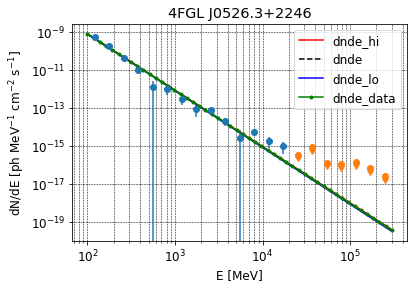

In [32]:
plt.loglog(E, dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, powerlaw(Prefactor2246,Index2246,Scale2246,E),'g.-', label='dnde_data')
plt.errorbar(sed2246['e_ctr'][:-7],
             1*sed2246['dnde'][:-7], 
             yerr=sed2246['dnde_err'][:-7], fmt ='o')
plt.errorbar(np.array(sed2246['e_ctr'][-7:]),
         sed2246['dnde_ul95'][-7:], yerr=0.2*sed2246['dnde_ul95'][-7:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

In [33]:
xerror2246 = np.append(sed2246['e_ctr'][:-7],sed2246['e_ctr'][-7:])
yerror2246 = np.append(sed2246['dnde'][:-7],sed2246['dnde_ul95'][-7:])

In [34]:
xerror2246

array([1.21001290e+02, 1.77159726e+02, 2.59382099e+02, 3.79769428e+02,
       5.56032274e+02, 8.14094836e+02, 1.19192794e+03, 1.74513890e+03,
       2.55508293e+03, 3.74093360e+03, 5.47721766e+03, 8.01936536e+03,
       1.17412680e+04, 1.71905590e+04, 2.51692341e+04, 3.68510613e+04,
       5.39541680e+04, 7.89950721e+04, 1.15659151e+05, 1.69338224e+05,
       2.47930525e+05])

In [35]:
len(yerror2246)

21

No handles with labels found to put in legend.


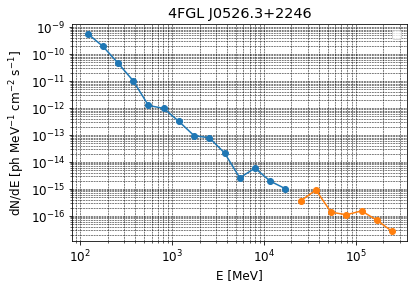

In [36]:
plt.loglog(sed2246['e_ctr'][:-7],sed2246['dnde'][:-7],'o-')
plt.loglog(np.array(sed2246['e_ctr'][-7:]),sed2246['dnde_ul95'][-7:],'o-')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()


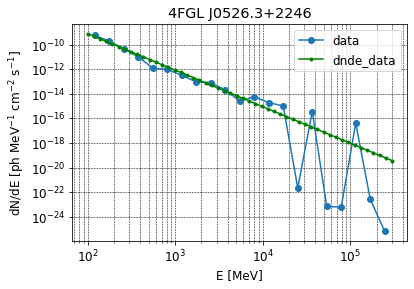

In [37]:
plt.loglog(sed2246['e_ctr'],sed2246['dnde'],"o-", label='data')
plt.loglog(E, powerlaw(Prefactor2246,Index2246,Scale2246,E),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()


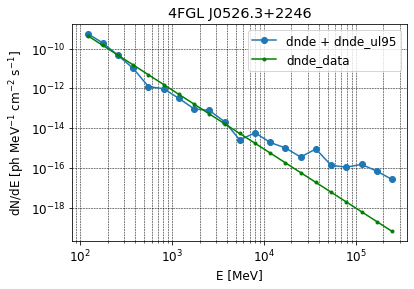

In [38]:
xerror2246 = np.append(sed2246['e_ctr'][:-7],sed2246['e_ctr'][-7:])
yerror2246 = np.append(sed2246['dnde'][:-7],sed2246['dnde_ul95'][-7:])
plt.loglog(xerror2246, yerror2246,"o-",label='dnde + dnde_ul95')
plt.loglog(xerror2246, powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()

In [39]:
len(xerror2246)

21

In [40]:
error2246 = np.append(sed2246['dnde_err'][:-7],0.2*sed2246['dnde_ul95'][-7:])

In [41]:
sed2246['dnde_err']

array([8.90811918e-11, 3.11638852e-11, 1.09085259e-11, 3.92851204e-12,
       1.39177638e-12, 4.84692572e-13, 1.74616911e-13, 6.03001873e-14,
       2.68729200e-14, 1.03597893e-14, 4.54370330e-15, 2.49158612e-15,
       1.12115541e-15, 6.34839177e-16, 1.32841158e-16, 2.43836346e-16,
       5.07056862e-17, 4.14892095e-17, 4.21035489e-17, 3.21779756e-17,
       9.85822337e-18])

In [42]:
error2246

array([8.90811918e-11, 3.11638852e-11, 1.09085259e-11, 3.92851204e-12,
       1.39177638e-12, 4.84692572e-13, 1.74616911e-13, 6.03001873e-14,
       2.68729200e-14, 1.03597893e-14, 4.54370330e-15, 2.49158612e-15,
       1.12115541e-15, 6.34839177e-16, 7.14293106e-17, 1.80531978e-16,
       2.73699475e-17, 2.18940555e-17, 3.03732382e-17, 1.39139694e-17,
       5.33435452e-18])

In [43]:
yerror2246

array([5.66065847e-10, 1.93023411e-10, 4.58193332e-11, 1.00559878e-11,
       1.23172493e-12, 9.61046425e-13, 3.15505430e-13, 9.35018991e-14,
       7.80268780e-14, 2.13892799e-14, 2.56441105e-15, 5.86777574e-15,
       1.92608737e-15, 1.01383865e-15, 3.57146553e-16, 9.02659891e-16,
       1.36849737e-16, 1.09470277e-16, 1.51866191e-16, 6.95698471e-17,
       2.66717726e-17])

In [44]:
powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)

array([4.48953631e-10, 1.44691740e-10, 4.66322090e-11, 1.50284222e-11,
       4.84329351e-12, 1.56092860e-12, 5.03066373e-13, 1.62126008e-13,
       5.22510399e-14, 1.68398101e-14, 5.42705957e-15, 1.74900878e-15,
       5.63682093e-16, 1.81667186e-16, 5.85468978e-17, 1.88682355e-17,
       6.08097949e-18, 1.95981821e-18, 6.31601552e-19, 2.03556717e-19,
       6.56036025e-20])

In [45]:
sed2246['dnde']

array([5.66065847e-10, 1.93023411e-10, 4.58193332e-11, 1.00559878e-11,
       1.23172493e-12, 9.61046425e-13, 3.15505430e-13, 9.35018991e-14,
       7.80268780e-14, 2.13892799e-14, 2.56441105e-15, 5.86777574e-15,
       1.92608737e-15, 1.01383865e-15, 2.20402407e-22, 3.65004168e-16,
       6.79151730e-24, 6.11455434e-24, 4.14808482e-17, 2.70577545e-23,
       6.49112646e-26])

In [46]:
error2246

array([8.90811918e-11, 3.11638852e-11, 1.09085259e-11, 3.92851204e-12,
       1.39177638e-12, 4.84692572e-13, 1.74616911e-13, 6.03001873e-14,
       2.68729200e-14, 1.03597893e-14, 4.54370330e-15, 2.49158612e-15,
       1.12115541e-15, 6.34839177e-16, 7.14293106e-17, 1.80531978e-16,
       2.73699475e-17, 2.18940555e-17, 3.03732382e-17, 1.39139694e-17,
       5.33435452e-18])

In [47]:
q = yerror2246- powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)

In [48]:
print(q/error2246)

[ 1.31466826  1.55088722 -0.07451747 -1.26572972 -2.59493452 -1.23765498
 -1.07412818 -1.13804138  0.95917519  0.43914694 -0.63002541  1.65307028
  1.21517968  1.31083822  4.18035191  4.89548536  4.77782276  4.91048629
  4.97920533  4.98537033  4.98770168]


In [49]:
sed2246['dnde']

array([5.66065847e-10, 1.93023411e-10, 4.58193332e-11, 1.00559878e-11,
       1.23172493e-12, 9.61046425e-13, 3.15505430e-13, 9.35018991e-14,
       7.80268780e-14, 2.13892799e-14, 2.56441105e-15, 5.86777574e-15,
       1.92608737e-15, 1.01383865e-15, 2.20402407e-22, 3.65004168e-16,
       6.79151730e-24, 6.11455434e-24, 4.14808482e-17, 2.70577545e-23,
       6.49112646e-26])

In [50]:
q = sed2246['dnde'] - powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)

In [51]:
print(q/sed2246['dnde_err'])

[ 1.31466826  1.55088722 -0.07451747 -1.26572972 -2.59493452 -1.23765498
 -1.07412818 -1.13804138  0.95917519  0.43914694 -0.63002541  1.65307028
  1.21517968  1.31083822 -0.44072694  1.41954199 -0.11992684 -0.04723667
  0.97020911 -0.00632512 -0.0066547 ]


In [52]:
sed2246['dnde_err']

array([8.90811918e-11, 3.11638852e-11, 1.09085259e-11, 3.92851204e-12,
       1.39177638e-12, 4.84692572e-13, 1.74616911e-13, 6.03001873e-14,
       2.68729200e-14, 1.03597893e-14, 4.54370330e-15, 2.49158612e-15,
       1.12115541e-15, 6.34839177e-16, 1.32841158e-16, 2.43836346e-16,
       5.07056862e-17, 4.14892095e-17, 4.21035489e-17, 3.21779756e-17,
       9.85822337e-18])

In [53]:
#dnde+uldnde_95
Chi_Square = ((yerror2246- powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246))/error2246)**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-3)
print('Chi_Square_dnde+uldnde_95 =' ,Chi_Square)
print('sum_Chi_Square =',sum_Chi_Square)
print('reduced_Chi_Square_dnde+uldnde_95 =', reduced_Chi_Square)
#dnde_data
Chi_Square = ((sed2246['dnde'] - powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246))/sed2246['dnde_err'])**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-3)
print('Chi_Square_dnde_data =' ,Chi_Square)
print('sum_Chi_Square_dnde_data =',sum_Chi_Square)
print('reduced_Chi_Square_dnde_data =', reduced_Chi_Square)

Chi_Square_dnde+uldnde_95 = [1.72835264e+00 2.40525118e+00 5.55285365e-03 1.60207172e+00
 6.73368515e+00 1.53178986e+00 1.15375134e+00 1.29513819e+00
 9.20017041e-01 1.92850039e-01 3.96932014e-01 2.73264135e+00
 1.47666166e+00 1.71829685e+00 1.74753421e+01 2.39657769e+01
 2.28275903e+01 2.41128756e+01 2.47924857e+01 2.48539174e+01
 2.48771680e+01]
sum_Chi_Square = 186.79814782110535
reduced_Chi_Square_dnde+uldnde_95 = 10.377674878950296
Chi_Square_dnde_data = [1.72835264e+00 2.40525118e+00 5.55285365e-03 1.60207172e+00
 6.73368515e+00 1.53178986e+00 1.15375134e+00 1.29513819e+00
 9.20017041e-01 1.92850039e-01 3.96932014e-01 2.73264135e+00
 1.47666166e+00 1.71829685e+00 1.94240237e-01 2.01509947e+00
 1.43824469e-02 2.23130299e-03 9.41305715e-01 4.00071833e-05
 4.42850571e-05]
sum_Chi_Square_dnde_data = 27.060335340437664
reduced_Chi_Square_dnde_data = 1.503351963357648


In [54]:
yerror2246

array([5.66065847e-10, 1.93023411e-10, 4.58193332e-11, 1.00559878e-11,
       1.23172493e-12, 9.61046425e-13, 3.15505430e-13, 9.35018991e-14,
       7.80268780e-14, 2.13892799e-14, 2.56441105e-15, 5.86777574e-15,
       1.92608737e-15, 1.01383865e-15, 3.57146553e-16, 9.02659891e-16,
       1.36849737e-16, 1.09470277e-16, 1.51866191e-16, 6.95698471e-17,
       2.66717726e-17])

In [55]:
(powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246))

array([4.48953631e-10, 1.44691740e-10, 4.66322090e-11, 1.50284222e-11,
       4.84329351e-12, 1.56092860e-12, 5.03066373e-13, 1.62126008e-13,
       5.22510399e-14, 1.68398101e-14, 5.42705957e-15, 1.74900878e-15,
       5.63682093e-16, 1.81667186e-16, 5.85468978e-17, 1.88682355e-17,
       6.08097949e-18, 1.95981821e-18, 6.31601552e-19, 2.03556717e-19,
       6.56036025e-20])

In [56]:
(yerror2246-(powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)))*100/(powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246))

array([ 2.60855927e+01,  3.34032002e+01, -1.74316378e+00, -3.30868694e+01,
       -7.45684434e+01, -3.84311093e+01, -3.72835382e+01, -4.23276373e+01,
        4.93307657e+01,  2.70161588e+01, -5.27476894e+01,  2.35491498e+02,
        2.41697456e+02,  4.58074724e+02,  5.10017893e+02,  4.68401857e+03,
        2.15045550e+03,  5.48573631e+03,  2.39446197e+04,  3.40771316e+04,
        4.05559573e+04])

In [57]:
(yerror2246-(powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)))**2 /((powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)))

array([3.05494155e-11, 1.61443250e-11, 1.41697562e-14, 1.64522289e-12,
       2.69309047e-12, 2.30541375e-13, 6.99293562e-14, 2.90469638e-14,
       1.27154183e-14, 1.22909199e-15, 1.50998095e-15, 9.69934603e-15,
       3.29289889e-15, 3.81196712e-15, 1.52291167e-15, 4.13969653e-14,
       2.81212395e-15, 5.89774030e-15, 3.62125473e-14, 2.36380420e-14,
       1.07903865e-14])

In [58]:
((6.56036025e-20-2.66717726e-17)**2)/6.56036025e-20

1.0790386529817936e-14

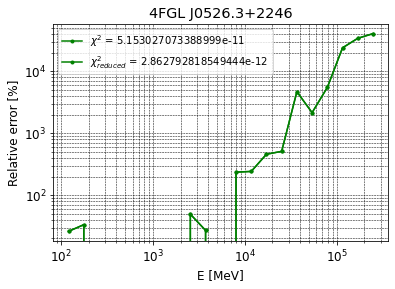

In [59]:
chi2246 = chisquare(yerror2246, f_exp= powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246))
rechi2246 = chi2246[0]/(21-3)

plt.plot(xerror2246,(yerror2246-(powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)))*100/(powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2246[0]))
plt.plot(xerror2246,(yerror2246-(powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)))*100/(powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2246))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

In [60]:
chi2246

Power_divergenceResult(statistic=5.153027073388999e-11, pvalue=1.0)

In [61]:
rechi2246

2.862792818549444e-12

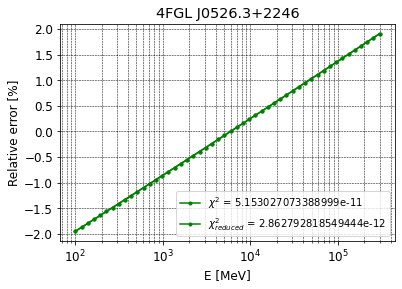

In [62]:
#chi2246 = chisquare(dnde, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E)))
#rechi2246 = chi2246[0]/(50-3)
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,((powerlaw(Prefactor2246,Index2246,Scale2246,E)) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2246[0]))
plt.plot(E,((powerlaw(Prefactor2246,Index2246,Scale2246,E)) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2246))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='lower right',fontsize=10)
plt.show()
plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

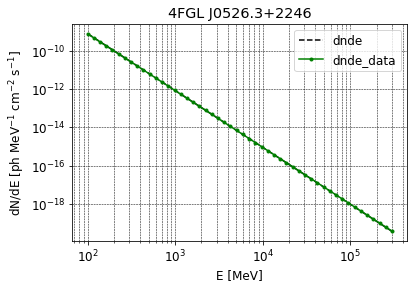

In [63]:
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, powerlaw(Prefactor2246,Index2246,Scale2246,E),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [64]:
Prefactor2246= 1.04*1e-14
Index2246= -2.97
Scale2246= 4.4e+03

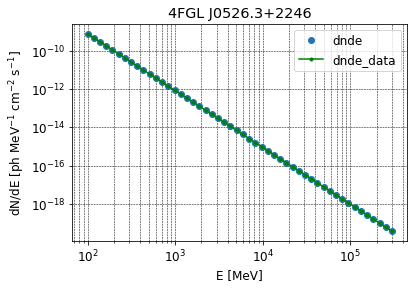

In [65]:
plt.loglog(E, dnde, 'o',label ='dnde')
plt.loglog(E, powerlaw(Prefactor2246,Index2246,Scale2246,E),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [66]:
chi2246 = chisquare(dnde, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E)))

In [67]:
chi2246

Power_divergenceResult(statistic=7.1879496004918e-13, pvalue=1.0)

In [68]:
len(E)

50

In [69]:
rechi2246 = chi2246[0]/(50-3)

In [70]:
rechi2246

1.5293509788280426e-14

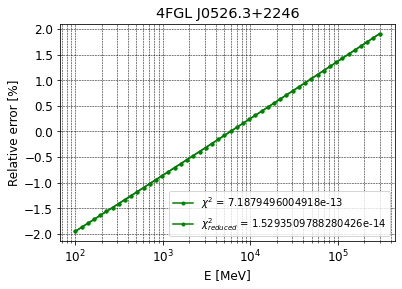

In [71]:
chi2246 = chisquare(dnde, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E)))
rechi2246 = chi2246[0]/(50-3)
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,((powerlaw(Prefactor2246,Index2246,Scale2246,E)) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2246[0]))
plt.plot(E,((powerlaw(Prefactor2246,Index2246,Scale2246,E)) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2246))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='lower right',fontsize=10)
plt.show()
plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

In [72]:
sed2246['dnde'][:-3]*1e-6

array([5.66065847e-16, 1.93023411e-16, 4.58193332e-17, 1.00559878e-17,
       1.23172493e-18, 9.61046425e-19, 3.15505430e-19, 9.35018991e-20,
       7.80268780e-20, 2.13892799e-20, 2.56441105e-21, 5.86777574e-21,
       1.92608737e-21, 1.01383865e-21, 2.20402407e-28, 3.65004168e-22,
       6.79151730e-30, 6.11455434e-30])

In [73]:
sed2246['dnde_err'][:-3]*1e-6

array([8.90811918e-17, 3.11638852e-17, 1.09085259e-17, 3.92851204e-18,
       1.39177638e-18, 4.84692572e-19, 1.74616911e-19, 6.03001873e-20,
       2.68729200e-20, 1.03597893e-20, 4.54370330e-21, 2.49158612e-21,
       1.12115541e-21, 6.34839177e-22, 1.32841158e-22, 2.43836346e-22,
       5.07056862e-23, 4.14892095e-23])

In [74]:
len(sed2246['dnde_err']*1e-6)

21

In [75]:
1*sed2246['dnde_ul95'][-3:]*1e-6

array([1.51866191e-22, 6.95698471e-23, 2.66717726e-23])

In [76]:
0.99*sed2246['dnde_ul95'][-3:]*1e-6

array([1.50347529e-22, 6.88741486e-23, 2.64050549e-23])

In [77]:
sed2246['dnde_err']*1e-6

array([8.90811918e-17, 3.11638852e-17, 1.09085259e-17, 3.92851204e-18,
       1.39177638e-18, 4.84692572e-19, 1.74616911e-19, 6.03001873e-20,
       2.68729200e-20, 1.03597893e-20, 4.54370330e-21, 2.49158612e-21,
       1.12115541e-21, 6.34839177e-22, 1.32841158e-22, 2.43836346e-22,
       5.07056862e-23, 4.14892095e-23, 4.21035489e-23, 3.21779756e-23,
       9.85822337e-24])

In [78]:
len(sed2246['dnde'])

21

In [79]:
sed2246['dnde']*1e-6

array([5.66065847e-16, 1.93023411e-16, 4.58193332e-17, 1.00559878e-17,
       1.23172493e-18, 9.61046425e-19, 3.15505430e-19, 9.35018991e-20,
       7.80268780e-20, 2.13892799e-20, 2.56441105e-21, 5.86777574e-21,
       1.92608737e-21, 1.01383865e-21, 2.20402407e-28, 3.65004168e-22,
       6.79151730e-30, 6.11455434e-30, 4.14808482e-23, 2.70577545e-29,
       6.49112646e-32])

In [80]:
len(sed2246['e_ctr'])

21

In [81]:
src = gta.roi['4FGL J0526.3+2246']

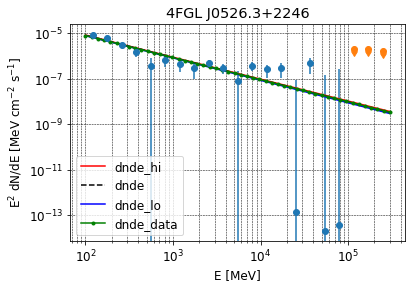

In [82]:
plt.loglog(E, (E**2)*dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, (E**2)*dnde, 'k--',label ='dnde')
plt.loglog(E, (E**2)*dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, (E**2)*powerlaw(Prefactor2246,Index2246,Scale2246,E),'g.-', label='dnde_data')
plt.errorbar(sed2246['e_ctr'][:-3],
             1*sed2246['e2dnde'][:-3], 
             yerr=sed2246['e2dnde_err'][:-3], fmt ='o')
plt.errorbar(np.array(sed2246['e_ctr'][-3:]),
         sed2246['e2dnde_ul95'][-3:], yerr=0.2*sed2246['e2dnde_ul95'][-3:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^2$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='lower left')
plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit2.png")
plt.show()

4FGL J0534.5+2200

In [12]:
Prefactor2200=1.24*1e-10
Index12200= -1.9
Scale2200= 1.46e+03
Expfactor2200= 0.5*0.01
Index22200= 0.667

In [13]:
E = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['energies'])
dnde_hi = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde'])


In [14]:
PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,E)

array([1.81483559e-08, 1.31405964e-08, 9.50105098e-09, 6.85859988e-09,
       4.94227343e-09, 3.55432062e-09, 2.55050259e-09, 1.82567579e-09,
       1.30324754e-09, 9.27465964e-10, 6.57784242e-10, 4.64742413e-10,
       3.26959346e-10, 2.28936526e-10, 1.59455350e-10, 1.10408180e-10,
       7.59462907e-11, 5.18592338e-11, 3.51231136e-11, 2.35720979e-11,
       1.56597785e-11, 1.02859982e-11, 6.67134594e-12, 4.26632639e-12,
       2.68573320e-12, 1.66131957e-12, 1.00773835e-12, 5.98092615e-13,
       3.46436999e-13, 1.95298442e-13, 1.06815779e-13, 5.64834742e-14,
       2.87653590e-14, 1.40475119e-14, 6.54654907e-15, 2.89580620e-15,
       1.20854239e-15, 4.72694448e-16, 1.71981314e-16, 5.77226889e-17,
       1.77068869e-17, 4.91325788e-18, 1.21902303e-18, 2.66977673e-19,
       5.08768443e-20, 8.30215354e-21, 1.13953814e-21, 1.28968407e-22,
       1.17708246e-23, 8.45164818e-25])

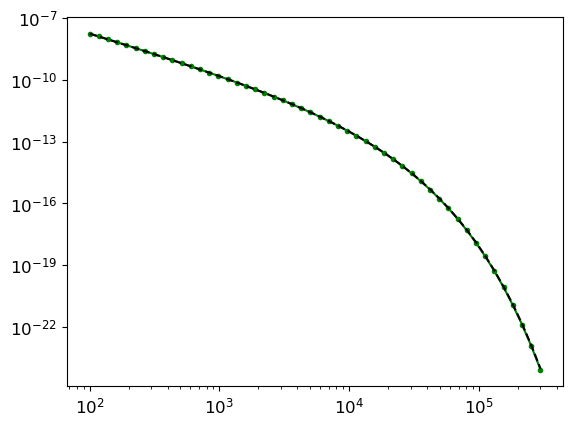

In [15]:
plt.loglog(E, PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,E),'g.-', label='dnde_data')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.show()

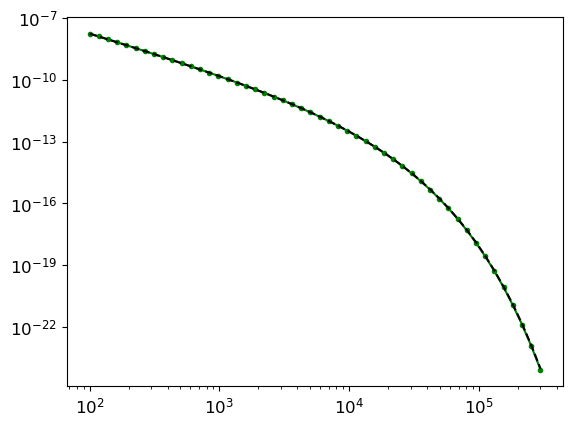

In [16]:
plt.loglog(E, PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,E),'g.-', label='dnde_data')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.show()

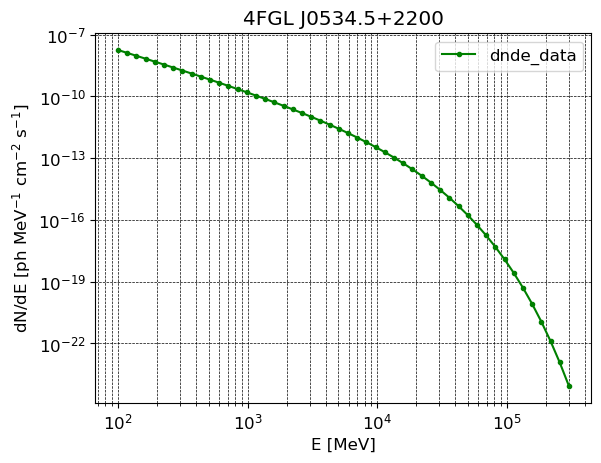

In [17]:
#plt.loglog(E, dnde_hi, 'r', label='dnde_hi')
#plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
#plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E,PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,E),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [18]:
sed2200 = gta.sed('4FGL J0534.5+2200')

2023-03-24 21:37:23 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2200
2023-03-24 21:37:39 INFO    GTAnalysis._make_sed(): Fitting SED
2023-03-24 21:37:39 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2200     : ['Index1', 'Expfactor']
2023-03-24 21:37:39 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201s    : ['Index']
2023-03-24 21:37:39 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2023-03-24 21:37:39 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0526.3+2246     : ['Index']
2023-03-24 21:37:39 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0544.4+2238     : ['Index']


Drm_Cache::update Measured counts < 0 4FGL J0534.5+2200 20 -3.09981e-15 6.31032e-16
4.49976e-06 5.54142e-06 5.69805e-06 5.1733e-06 4.29063e-06 3.26573e-06 2.32218e-06 1.52539e-06 9.09312e-07 4.94336e-07 2.46682e-07 1.13892e-07 4.67763e-08 1.63492e-08 4.70953e-09 1.09492e-09 1.82907e-10 2.01328e-11 1.32204e-12 4.44625e-14 6.31032e-16 


/home/user/anaconda3/envs/fermi/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2023-03-24 21:37:50 INFO    GTAnalysis.sed(): Finished SED
2023-03-24 21:37:58 INFO    GTAnalysis.sed(): Execution time: 35.42 s


In [19]:
src2200 = gta.roi['4FGL J0534.5+2200']

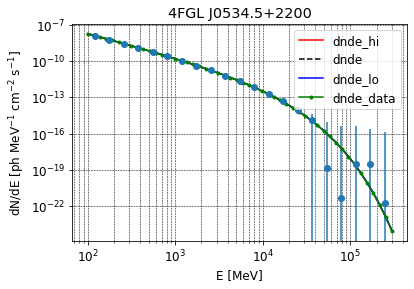

In [91]:
plt.loglog(E, dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,E),'g.-', label='dnde_data')
plt.errorbar(sed2200['e_ctr'],
             1*sed2200['dnde'], 
             yerr=sed2200['dnde_err'], fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

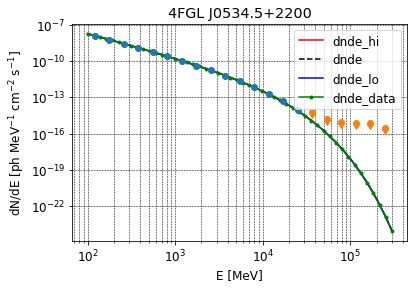

In [92]:
plt.loglog(E, dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,E),'g.-', label='dnde_data')
plt.errorbar(sed2200['e_ctr'][:-6],
             1*sed2200['dnde'][:-6], 
             yerr=sed2200['dnde_err'][:-6], fmt ='o')
plt.errorbar(np.array(sed2200['e_ctr'][-6:]),
         sed2200['dnde_ul95'][-6:], yerr=0.2*sed2200['dnde_ul95'][-6:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

In [93]:
len(E)

50

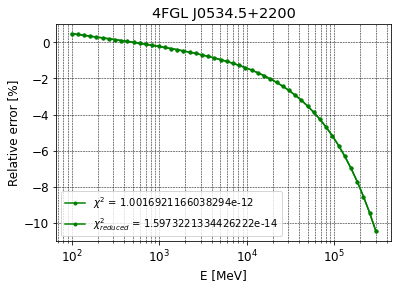

In [94]:
chi2200 = chisquare(dnde, f_exp=(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,E)))
rechi2200 = chi2246[0]/(50-5)
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,E) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2200[0]))
plt.plot(E,(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,E) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2200))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='lower left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

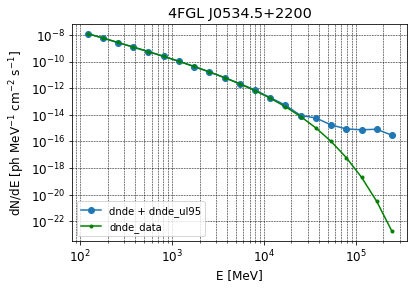

In [95]:
xerror2200 = np.append(sed2200['e_ctr'][:-6],sed2200['e_ctr'][-6:])
yerror2200 = np.append(sed2200['dnde'][:-6],sed2200['dnde_ul95'][-6:])
#sedyerror2200 = sed2200['dnde']
plt.loglog(xerror2200, yerror2200,"o-",label='dnde + dnde_ul95')
plt.loglog(xerror2200, PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='lower left',fontsize=10)
plt.show()

In [96]:
len(yerror2200)

21

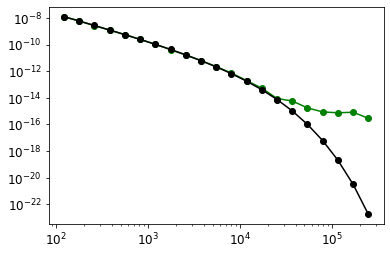

In [97]:
plt.loglog(xerror2200,yerror2200,'go-')
plt.loglog(xerror2200,PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200),'ko-')
plt.show()

In [98]:
yerror2200

array([1.22845520e-08, 5.92840661e-09, 2.60173095e-09, 1.21586169e-09,
       5.58042415e-10, 2.44408436e-10, 1.05921045e-10, 4.18660911e-11,
       1.64860026e-11, 6.22330458e-12, 2.20065428e-12, 7.31729921e-13,
       1.95248151e-13, 5.31409190e-14, 8.82667742e-15, 5.79731946e-15,
       1.73693242e-15, 8.70090107e-16, 7.51116954e-16, 8.26879275e-16,
       2.89623400e-16])

In [99]:
PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200)

array([1.24504004e-08, 5.82350494e-09, 2.69602955e-09, 1.23169130e-09,
       5.53172176e-10, 2.43031617e-10, 1.03783638e-10, 4.27242792e-11,
       1.67771124e-11, 6.19876034e-12, 2.11720505e-12, 6.53469215e-13,
       1.76998726e-13, 4.05094614e-14, 7.46065710e-15, 1.03831886e-15,
       1.00698005e-16, 6.12909939e-18, 2.04563709e-19, 3.14674323e-21,
       1.78253512e-23])

In [100]:
(sed2200['dnde_err'][:-6])

array([9.03411052e-11, 3.65151748e-11, 1.59833508e-11, 7.53685809e-12,
       3.72048441e-12, 1.85166892e-12, 9.43844345e-13, 4.79751005e-13,
       2.48433326e-13, 1.30996378e-13, 6.88156753e-14, 3.57324092e-14,
       1.80316083e-14, 9.51748914e-15, 4.91366194e-15])

In [101]:
((2.60173095e-09-2.69602955e-09)/1.59833508e-11)**2

34.807659935775085

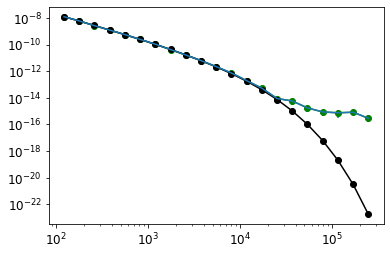

In [102]:
plt.loglog(xerror2200,yerror2200,'go-')
plt.loglog(xerror2200,PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200),'ko-')
plt.errorbar(xerror2200,yerror2200,(sed2200['dnde_err']))
plt.show()

In [103]:
Chi_Square = ((yerror2200 - PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200))/sed2200['dnde_err'])**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(15-5)
print('Chi_Square =' ,Chi_Square)
print('sum_Chi_Square =',sum_Chi_Square)
print('reduced_Chi_Square =', reduced_Chi_Square)

Chi_Square = [ 3.37016781  8.25311785 34.80766123  4.41123234  1.71356851  0.55287536
  5.12830453  3.1998767   1.37307342  0.03510594  1.47051651  4.79692499
  1.02430539  1.76141688  0.07728652  3.05502019  3.67150056  4.61741268
  2.91674561 10.46827601  3.99564032]
sum_Chi_Square = 100.70002936093042
reduced_Chi_Square = 10.070002936093042


In [104]:
len(xerror2200)

21

In [105]:
xerror2200 = sed2200['e_ctr']
yerror2200 = sed2200['dnde']
Chi_Square = ((yerror2200 - PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200))/sed2200['dnde_err'])**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(xerror2200)-5)
print('Chi_Square =' ,Chi_Square)
print('sum_Chi_Square =',sum_Chi_Square)
print('reduced_Chi_Square =', reduced_Chi_Square)

Chi_Square = [3.37016781e+00 8.25311785e+00 3.48076612e+01 4.41123234e+00
 1.71356851e+00 5.52875359e-01 5.12830453e+00 3.19987670e+00
 1.37307342e+00 3.51059363e-02 1.47051651e+00 4.79692499e+00
 1.02430539e+00 1.76141688e+00 7.72865234e-02 1.64184886e-02
 1.38655677e-02 2.32346223e-04 7.98085843e-08 1.31378183e-06
 1.41441091e-12]
sum_Chi_Square = 72.00595178484619
reduced_Chi_Square = 4.500371986552887


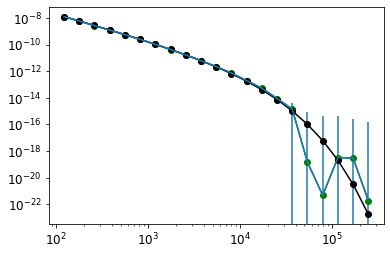

In [106]:
plt.loglog(xerror2200,yerror2200,'go-')
plt.loglog(xerror2200,PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200),'ko-')
plt.errorbar(xerror2200,yerror2200,(sed2200['dnde_err']))
plt.show()

In [107]:
(sed2200['dnde_err'][:-6])

array([9.03411052e-11, 3.65151748e-11, 1.59833508e-11, 7.53685809e-12,
       3.72048441e-12, 1.85166892e-12, 9.43844345e-13, 4.79751005e-13,
       2.48433326e-13, 1.30996378e-13, 6.88156753e-14, 3.57324092e-14,
       1.80316083e-14, 9.51748914e-15, 4.91366194e-15])

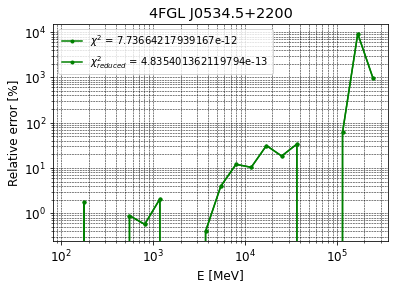

In [108]:
chi2200 = chisquare(yerror2200, f_exp= PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200))
rechi2200 = chi2200[0]/(21-5)
plt.plot(xerror2200,(yerror2200-(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200)))*100/(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200)),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2200[0]))
plt.plot(xerror2200,(yerror2200-(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200)))*100/(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200)),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2200))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='upper left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

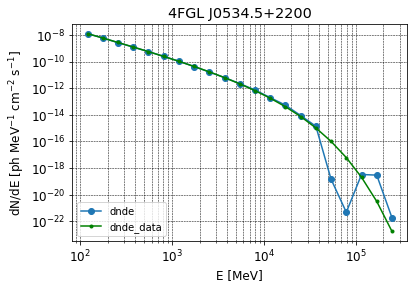

In [109]:

sedyerror2200 = sed2200['dnde']
plt.loglog(xerror2200, sedyerror2200,"o-",label='dnde')
plt.loglog(xerror2200, PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='lower left',fontsize=10)
plt.show()

In [110]:
np.append(sed2200['dnde'][:-6],sed2200['dnde_ul95'][-6:])

array([1.22845520e-08, 5.92840661e-09, 2.60173095e-09, 1.21586169e-09,
       5.58042415e-10, 2.44408436e-10, 1.05921045e-10, 4.18660911e-11,
       1.64860026e-11, 6.22330458e-12, 2.20065428e-12, 7.31729921e-13,
       1.95248151e-13, 5.31409190e-14, 8.82667742e-15, 5.79731946e-15,
       1.73693242e-15, 8.70090107e-16, 7.51116954e-16, 8.26879275e-16,
       2.89623400e-16])

In [111]:
#dnde+uldnde_95
error2200 = np.append(sed2200['dnde_err'][:-6],0.2*sed2200['dnde_ul95'][-6:])
Chi_Square = ((yerror2200- PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200))/error2200)**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-5)
print('Chi_Square_dnde+uldnde_95 =' ,Chi_Square)
print('sum_Chi_Square =',sum_Chi_Square)
print('reduced_Chi_Square_dnde+uldnde_95 =', reduced_Chi_Square)
#dnde_data
Chi_Square = ((sed2200['dnde'] - PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200))/sed2200['dnde_err'])**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-5)
print('Chi_Square_dnde_data =' ,Chi_Square)
print('sum_Chi_Square_dnde_data =',sum_Chi_Square)
print('reduced_Chi_Square_dnde_data =', reduced_Chi_Square)

Chi_Square_dnde+uldnde_95 = [3.37016781e+00 8.25311785e+00 3.48076612e+01 4.41123234e+00
 1.71356851e+00 5.52875359e-01 5.12830453e+00 3.19987670e+00
 1.37307342e+00 3.51059363e-02 1.47051651e+00 4.79692499e+00
 1.02430539e+00 1.76141688e+00 7.72865234e-02 9.05390961e-02
 8.37836487e-02 1.24032860e-03 6.83682517e-07 3.13750762e-06
 8.84971260e-12]
sum_Chi_Square = 72.15100088322312
reduced_Chi_Square_dnde+uldnde_95 = 4.509437555201445
Chi_Square_dnde_data = [3.37016781e+00 8.25311785e+00 3.48076612e+01 4.41123234e+00
 1.71356851e+00 5.52875359e-01 5.12830453e+00 3.19987670e+00
 1.37307342e+00 3.51059363e-02 1.47051651e+00 4.79692499e+00
 1.02430539e+00 1.76141688e+00 7.72865234e-02 1.64184886e-02
 1.38655677e-02 2.32346223e-04 7.98085843e-08 1.31378183e-06
 1.41441091e-12]
sum_Chi_Square_dnde_data = 72.00595178484619
reduced_Chi_Square_dnde_data = 4.500371986552887


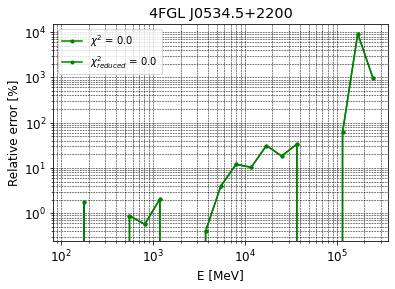

In [112]:
chi2200 = chisquare(yerror2200, f_exp= sedyerror2200)
rechi2200 = chi2200[0]/(21-5)
plt.plot(xerror2200,(sedyerror2200-(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200)))*100/(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200)),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2200[0]))
plt.plot(xerror2200,(sedyerror2200-(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200)))*100/(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200)),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2200))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='upper left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

In [113]:
chi2200

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [114]:
rechi2200

0.0

4FGL J0534.5+2201i

In [20]:
norm=0.769*1e-12
alpha=2.04
beta=0.0181
Eb=1e+04

In [21]:
E = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde'])


In [22]:
len(E)

50

In [23]:
a = LogParabola(1,1,1,1,1)

In [24]:
print(a)

1.0


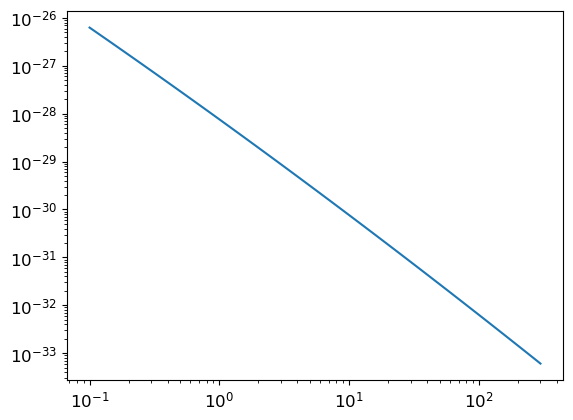

In [25]:
plt.loglog(E/1e3,LogParabola(norm,-alpha,beta,Eb,E)*10**-18)
plt.show()

In [26]:
sed2201i = gta.sed('4FGL J0534.5+2201i')

2023-03-24 21:37:59 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2201i
2023-03-24 21:38:10 INFO    GTAnalysis._make_sed(): Fitting SED
2023-03-24 21:38:10 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2200     : ['Index1', 'Expfactor']
2023-03-24 21:38:10 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201s    : ['Index']
2023-03-24 21:38:10 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2023-03-24 21:38:10 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0526.3+2246     : ['Index']
2023-03-24 21:38:10 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0544.4+2238     : ['Index']
/home/user/anaconda3/envs/fermi/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation

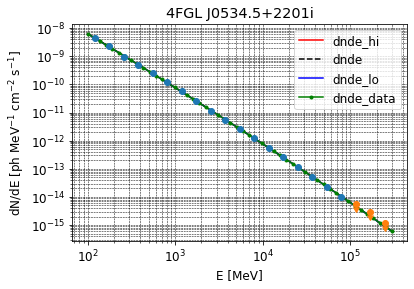

In [122]:
plt.loglog(E, dnde_hi ,'r', label='dnde_hi')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E,LogParabola(norm,-alpha,beta,Eb,E), 'g.-', label='dnde_data')
plt.errorbar(sed2201i['e_ctr'][:-3],
             1*sed2201i['dnde'][:-3], 
             yerr=sed2201i['dnde_err'][:-3], fmt ='o')
plt.errorbar(np.array(sed2201i['e_ctr'][-3:]),
         sed2201i['dnde_ul95'][-3:], yerr=0.2*sed2201i['dnde_ul95'][-3:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

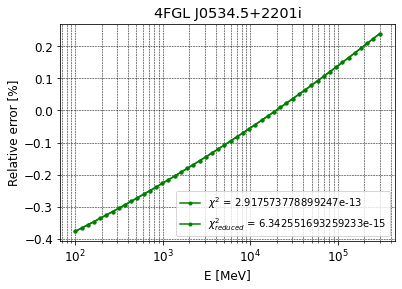

In [123]:
chi2201i = chisquare(dnde, f_exp=(LogParabola(norm,-alpha,beta,Eb,E)))
rechi2201i = chi2201i[0]/(50-4)
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,(LogParabola(norm,-alpha,beta,Eb,E) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2201i[0]))
plt.plot(E,(LogParabola(norm,-alpha,beta,Eb,E) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2201i))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='lower right',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

In [124]:
chi2201i

Power_divergenceResult(statistic=2.917573778899247e-13, pvalue=1.0)

In [125]:
rechi2201i

6.342551693259233e-15

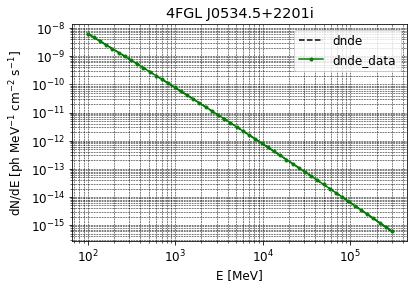

In [126]:

plt.loglog(E, dnde ,'k--',label ='dnde')

plt.loglog(E,LogParabola(norm,-alpha,beta,Eb,E), 'g.-', label='dnde_data')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

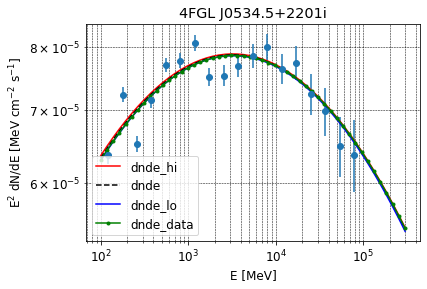

In [127]:
plt.loglog(E, (E**2)*dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, (E**2)*dnde, 'k--',label ='dnde')
plt.loglog(E, (E**2)*dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, (E**2)*LogParabola(norm,-alpha,beta,Eb,E), 'g.-',label ='dnde_data')
plt.errorbar(sed2201i['e_ctr'][:-3],
             1*sed2201i['e2dnde'][:-3], 
             yerr=sed2201i['e2dnde_err'][:-3], fmt ='o')
#plt.errorbar(np.array(sed2201i['e_ctr'][-3:]),
#         sed2201i['e2dnde_ul95'][-3:], yerr=0.2*sed2201i['e2dnde_ul95'][-3:], 
#             fmt='o', uplims=True)

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^2$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='lower left')
plt.show()

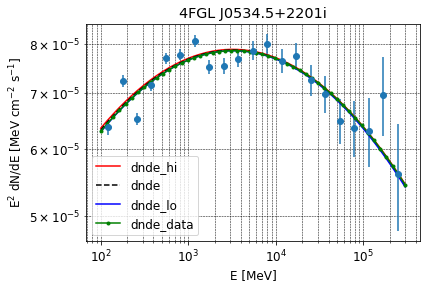

In [128]:
plt.loglog(E, (E**2)*dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, (E**2)*dnde, 'k--',label ='dnde')
plt.loglog(E, (E**2)*dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, (E**2)*LogParabola(norm,-alpha,beta,Eb,E), 'g.-',label ='dnde_data')
plt.errorbar(sed2201i['e_ctr'],
             1*sed2201i['e2dnde'], 
             yerr=sed2201i['e2dnde_err'], fmt ='o')
#plt.errorbar(np.array(sed2201i['e_ctr'][-3:]),
#         sed2201i['e2dnde_ul95'][-3:], yerr=0.2*sed2201i['e2dnde_ul95'][-3:], 
#             fmt='o', uplims=True)

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^2$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='lower left')
plt.show()

In [129]:
a = chisquare(dnde, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E)))

In [130]:
a[0]

3.4155863850834977e-07

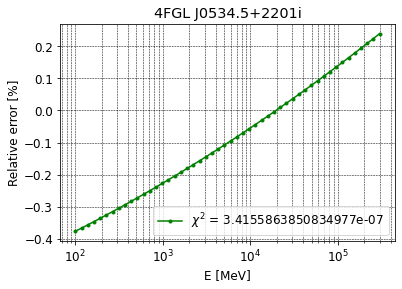

In [131]:
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,((LogParabola(norm,-alpha,beta,Eb,E)) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(a[0]))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.xscale('log')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='lower right')
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

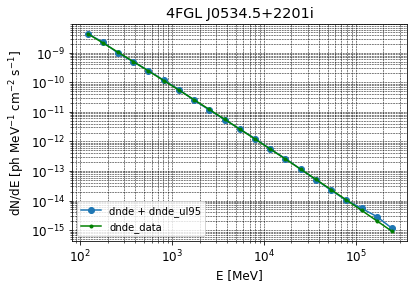

In [132]:
xerror2201i = np.append(sed2201i['e_ctr'][:-3],sed2201i['e_ctr'][-3:])
yerror2201i = np.append(sed2201i['dnde'][:-3],sed2201i['dnde_ul95'][-3:])
sedyerror2201i = sed2201i['dnde']
plt.loglog(xerror2201i, yerror2201i,"o-",label='dnde + dnde_ul95')
plt.loglog(xerror2201i, LogParabola(norm,-alpha,beta,Eb,xerror2201i),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='lower left',fontsize=10)
plt.show()

In [133]:
#dnde+uldnde_95
error2201i = np.append(sed2201i['dnde_err'][:-3],0.2*sed2201i['dnde_ul95'][-3:])
Chi_Square = ((yerror2201i- LogParabola(norm,-alpha,beta,Eb,xerror2201i))/error2201i)**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-4)
print('Chi_Square_dnde+uldnde_95 =' ,Chi_Square)
print('sum_Chi_Square =',sum_Chi_Square)
print('reduced_Chi_Square_dnde+uldnde_95 =', reduced_Chi_Square)
#dnde_data
Chi_Square = ((sed2201i['dnde'] - LogParabola(norm,-alpha,beta,Eb,xerror2201i))/sed2201i['dnde_err'])**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-4)
print('Chi_Square_dnde_data =' ,Chi_Square)
print('sum_Chi_Square_dnde_data =',sum_Chi_Square)
print('reduced_Chi_Square_dnde_data =', reduced_Chi_Square)

Chi_Square_dnde+uldnde_95 = [3.54618134e-01 1.94500950e+01 1.95492079e+01 4.94458531e-01
 5.79765471e+00 2.38551125e+00 7.24601366e+00 3.87137922e+00
 3.79936406e+00 8.40434359e-01 2.09570835e-02 1.23335460e+00
 5.18097316e-04 8.16376780e-01 2.62994267e-02 7.43845323e-02
 7.13472045e-01 1.48349798e-01 5.46338068e-01 2.01474251e+00
 1.09749989e+00]
sum_Chi_Square = 70.48102963246858
reduced_Chi_Square_dnde+uldnde_95 = 4.145942919556975
Chi_Square_dnde_data = [3.54618134e-01 1.94500950e+01 1.95492079e+01 4.94458531e-01
 5.79765471e+00 2.38551125e+00 7.24601366e+00 3.87137922e+00
 3.79936406e+00 8.40434359e-01 2.09570835e-02 1.23335460e+00
 5.18097316e-04 8.16376780e-01 2.62994267e-02 7.43845323e-02
 7.13472045e-01 1.48349798e-01 8.60551118e-03 1.86784518e+00
 5.73169691e-06]
sum_Chi_Square_dnde_data = 68.69890558840792
reduced_Chi_Square_dnde_data = 4.0411120934357605


In [134]:
(yerror2201i-LogParabola(norm,-alpha,beta,Eb,xerror2201i))*100/(LogParabola(norm,-alpha,beta,Eb,xerror2201i))

array([-1.21597516,  7.47351399, -6.79387188, -1.06540271,  3.72567648,
        2.49861446,  4.6877775 , -3.68881783, -4.06523346, -2.14458158,
        0.37957889,  3.28220735,  0.07410175,  3.38514687, -0.69486737,
       -1.37009056, -5.03322626, -2.87215931, 17.3473909 , 39.64203492,
       26.50593576])

In [135]:
(yerror2201i-sedyerror2201i)*100/(sedyerror2201i)

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , 16.33068632, 19.04190712,
       26.5502133 ])

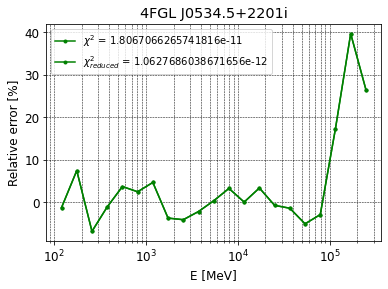

In [136]:
chi2201i = chisquare(yerror2201i, f_exp= LogParabola(norm,-alpha,beta,Eb,xerror2201i))
rechi2201i = chi2201i[0]/(21-4)
plt.plot(xerror2201i,(yerror2201i-LogParabola(norm,-alpha,beta,Eb,xerror2201i))*100/(LogParabola(norm,-alpha,beta,Eb,xerror2201i)),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2201i[0]))
plt.plot(xerror2201i,(yerror2201i-(LogParabola(norm,-alpha,beta,Eb,xerror2201i)))*100/(LogParabola(norm,-alpha,beta,Eb,xerror2201i)),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2201i))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='upper left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

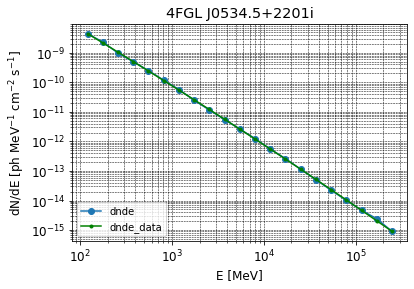

In [137]:
plt.loglog(xerror2201i, sedyerror2201i,"o-",label='dnde')
plt.loglog(xerror2201i, LogParabola(norm,-alpha,beta,Eb,xerror2201i),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='lower left',fontsize=10)
plt.show()

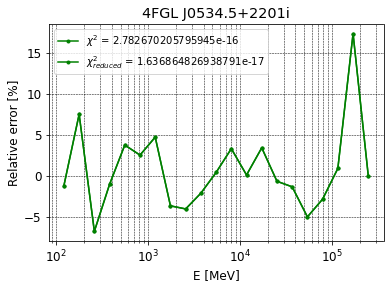

In [138]:
chi2201i = chisquare(yerror2201i, f_exp= sedyerror2201i)
rechi2201i = chi2201i[0]/(21-4)

plt.plot(xerror2201i,(sedyerror2201i-LogParabola(norm,-alpha,beta,Eb,xerror2201i))*100/LogParabola(norm,-alpha,beta,Eb,xerror2201i),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2201i[0]))
plt.plot(xerror2201i,(sedyerror2201i-LogParabola(norm,-alpha,beta,Eb,xerror2201i))*100/LogParabola(norm,-alpha,beta,Eb,xerror2201i),'g.-',  
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2201i))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='upper left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

4FGL J0534.5+2201s

In [27]:
Prefactor2201s = 2.88*1e-07
Index2201s = -4.57
Scale2201s = 50.5

In [28]:
E = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['energies'])
dnde_hi = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde'])


In [29]:
sed2201s = gta.sed('4FGL J0534.5+2201s')

2023-03-24 21:38:29 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2201s
2023-03-24 21:38:41 INFO    GTAnalysis._make_sed(): Fitting SED
2023-03-24 21:38:41 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2200     : ['Index1', 'Expfactor']
2023-03-24 21:38:41 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201s    : ['Index']
2023-03-24 21:38:41 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2023-03-24 21:38:41 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0526.3+2246     : ['Index']
2023-03-24 21:38:41 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0544.4+2238     : ['Index']
2023-03-24 21:38:53 INFO    GTAnalysis.sed(): Finished SED
2023-03-24 21:39:01 INFO    GTAnalysis.sed(): Execution time: 31.56 s


In [30]:
np.array(sed2201s['e_ctr']*1e-3)

array([1.21001290e-01, 1.77159726e-01, 2.59382099e-01, 3.79769428e-01,
       5.56032274e-01, 8.14094836e-01, 1.19192794e+00, 1.74513890e+00,
       2.55508293e+00, 3.74093360e+00, 5.47721766e+00, 8.01936536e+00,
       1.17412680e+01, 1.71905590e+01, 2.51692341e+01, 3.68510613e+01,
       5.39541680e+01, 7.89950721e+01, 1.15659151e+02, 1.69338224e+02,
       2.47930525e+02])

In [143]:
sed2201s['e2dnde']*1e-6

array([8.49794931e-11, 3.74447884e-11, 7.52584492e-12, 3.66893786e-12,
       4.31242655e-12, 2.39124636e-12, 3.71249842e-12, 1.10857382e-17,
       1.91154077e-18, 2.25130212e-19, 8.43484272e-15, 2.14890346e-12,
       6.96671307e-17, 1.26399397e-14, 3.27669324e-20, 3.53081739e-23,
       1.26922107e-20, 4.98189927e-24, 2.30735699e-18, 2.77378821e-18,
       2.94457725e-19])

In [144]:
sed2201s['e2dnde_err']*1e-6

array([1.31324294e-12, 1.13911310e-12, 1.06823888e-12, 1.08994715e-12,
       1.13954401e-12, 1.22023539e-12, 1.33088535e-12, 3.47873252e-13,
       3.83476290e-13, 7.62457609e-13, 2.08334586e-12, 2.30899642e-12,
       2.33398864e-12, 2.89077287e-12, 2.79422900e-12, 3.11157968e-12,
       1.98083172e-12, 3.58355165e-12, 6.20631124e-12, 7.35527319e-12,
       9.08155691e-12])

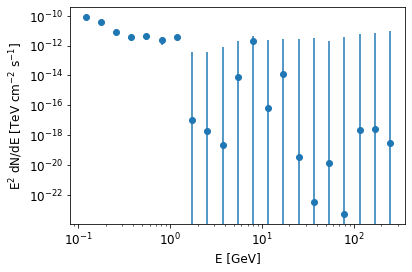

In [145]:
plt.errorbar(np.array(sed2201s['e_ctr']*1e-3),
             np.array(sed2201s['e2dnde']*1e-6), 
             yerr=np.array(sed2201s['e2dnde_err']*1e-6), fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

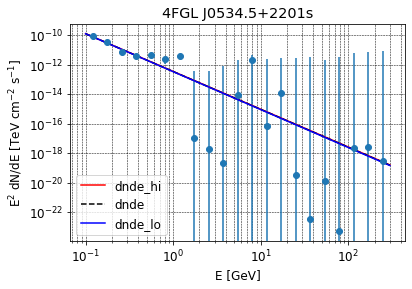

In [146]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2201s['e_ctr']*1e-3),
             sed2201s['e2dnde']*1e-6, 
             yerr=sed2201s['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='lower left')
plt.show()

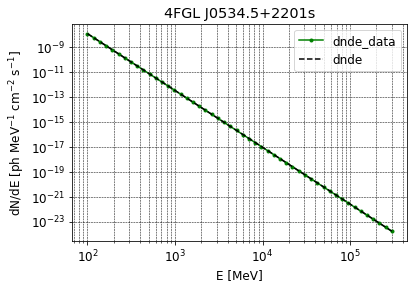

In [147]:
plt.loglog(E, powerlaw(Prefactor2201s,Index2201s,Scale2201s,E),'g.-', label='dnde_data')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

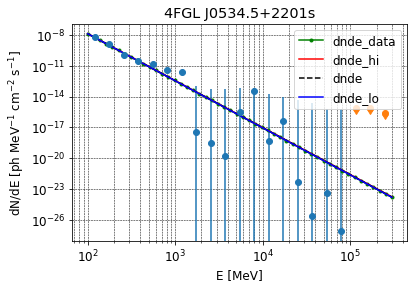

In [148]:
plt.loglog(E, powerlaw(Prefactor2201s,Index2201s,Scale2201s,E),'g.-', label='dnde_data')
plt.loglog(E, dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
plt.errorbar(sed2201s['e_ctr'][:-3],
             1*sed2201s['dnde'][:-3], 
             yerr=sed2201s['dnde_err'][:-3], fmt ='o')
plt.errorbar(np.array(sed2201s['e_ctr'][-3:]),
         sed2201s['dnde_ul95'][-3:], yerr=0.2*sed2201s['dnde_ul95'][-3:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

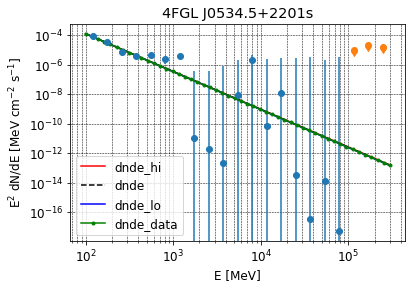

In [149]:
plt.loglog(E, (E**2)*dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, (E**2)*dnde, 'k--',label ='dnde')
plt.loglog(E, (E**2)*dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, (E**2)*powerlaw(Prefactor2201s,Index2201s,Scale2201s,E),'g.-', label='dnde_data')
plt.errorbar(sed2201s['e_ctr'][:-3],
             1*sed2201s['e2dnde'][:-3], 
             yerr=sed2201s['e2dnde_err'][:-3], fmt ='o')
plt.errorbar(np.array(sed2201s['e_ctr'][-3:]),
         sed2201s['e2dnde_ul95'][-3:], yerr=0.2*sed2201s['e2dnde_ul95'][-3:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^2$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='lower left')
plt.show()

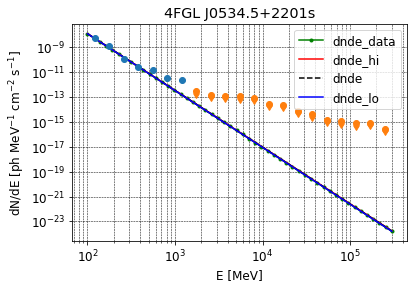

In [150]:
plt.loglog(E, powerlaw(Prefactor2201s,Index2201s,Scale2201s,E),'g.-', label='dnde_data')
plt.loglog(E, dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
plt.errorbar(sed2201s['e_ctr'][:-14],
             1*sed2201s['dnde'][:-14], 
             yerr=sed2201s['dnde_err'][:-14], fmt ='o')
plt.errorbar(np.array(sed2201s['e_ctr'][-14:]),
         sed2201s['dnde_ul95'][-14:], yerr=0.2*sed2201s['dnde_ul95'][-14:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

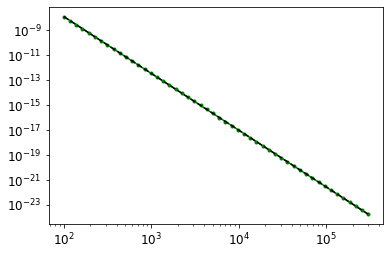

In [151]:
plt.loglog(E, powerlaw(Prefactor2201s,Index2201s,Scale2201s,E),'g.-', label='dnde_data')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.show()

In [152]:
(powerlaw(Prefactor2201s,Index2201s,Scale2201s,E) - (dnde))*100/(dnde)

array([-0.54294055, -0.58618004, -0.62940073, -0.67260263, -0.71578575,
       -0.75895009, -0.80209567, -0.84522249, -0.88833055, -0.93141988,
       -0.97449048, -1.01754235, -1.0605755 , -1.10358994, -1.14658569,
       -1.18956274, -1.2325211 , -1.27546079, -1.31838182, -1.36128418,
       -1.40416789, -1.44703295, -1.48987938, -1.53270718, -1.57551636,
       -1.61830693, -1.6610789 , -1.70383227, -1.74656706, -1.78928326,
       -1.8319809 , -1.87465997, -1.91732049, -1.95996245, -2.00258589,
       -2.04519079, -2.08777716, -2.13034502, -2.17289438, -2.21542524,
       -2.2579376 , -2.30043149, -2.3429069 , -2.38536384, -2.42780233,
       -2.47022236, -2.51262395, -2.55500711, -2.59737184, -2.63971816])

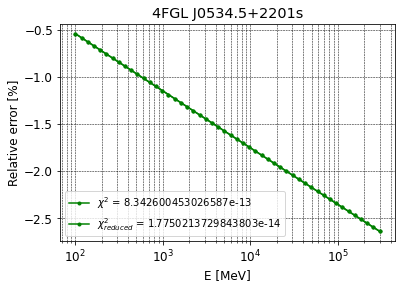

In [153]:
chi2201s = chisquare(dnde, f_exp=(powerlaw(Prefactor2201s,Index2201s,Scale2201s,E)))
rechi2201s = chi2201s[0]/(50-3)
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,(powerlaw(Prefactor2201s,Index2201s,Scale2201s,E) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2201s[0]))
plt.plot(E,(powerlaw(Prefactor2201s,Index2201s,Scale2201s,E) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2201s))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='lower left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

In [154]:
chi2201s

Power_divergenceResult(statistic=8.342600453026587e-13, pvalue=1.0)

In [155]:
rechi2201s

1.7750213729843803e-14

In [156]:
m = dnde*1e-6
n = powerlaw(Prefactor2201s,-Index2201s,Scale2201s,E/1e3)*1e-27

In [157]:
m = np.array([16, 18, 16, 14, 12, 12])
n = np.array([16, 16, 16, 16, 16, 8])

In [158]:
m

array([16, 18, 16, 14, 12, 12])

In [159]:
n

array([16, 16, 16, 16, 16,  8])

In [160]:
1.27584663e-14 - 6.50779832e-15

6.250667980000001e-15

In [161]:
(m-n)**2/n

array([0.  , 0.25, 0.  , 0.25, 1.  , 2.  ])

In [162]:
np.sum(((m-n)**2)/n)

3.5

In [163]:
a = chisquare(dnde, f_exp=((powerlaw(Prefactor2201s,-Index2201s,Scale2201s,E))))

In [164]:
a[0]

96546774739.54556

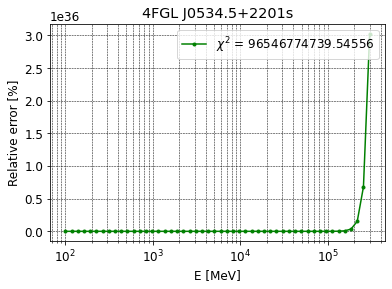

In [165]:
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,((powerlaw(Prefactor2201s,-Index2201s,Scale2201s,E)) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(a[0]))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.xscale('log')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

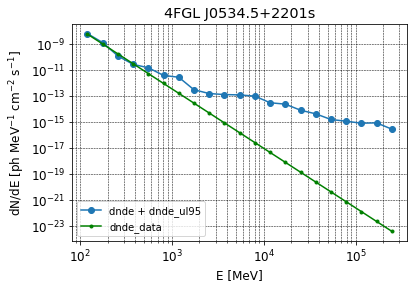

In [166]:
xerror2201s = np.append(sed2201s['e_ctr'][:-14],sed2201s['e_ctr'][-14:])
yerror2201s = np.append(sed2201s['dnde'][:-14],sed2201s['dnde_ul95'][-14:])
sedyerror2201s = sed2201s['dnde']
plt.loglog(xerror2201s, yerror2201s,"o-",label='dnde + dnde_ul95')
plt.loglog(xerror2201s, powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='lower left',fontsize=10)
plt.show()

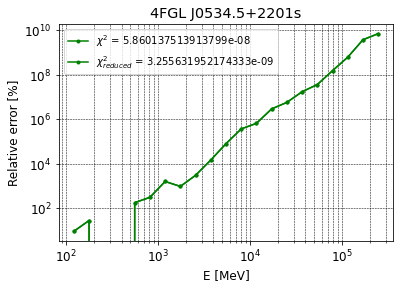

In [167]:
chi2201s = chisquare(yerror2201s, f_exp= powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s))
rechi2201s = chi2201s[0]/(21-3)
plt.plot(xerror2201s,(yerror2201s-powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s))*100/(powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s)),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2201s[0]))
plt.plot(xerror2201s,(yerror2201s-(powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s)))*100/(powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s)),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2201s))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='upper left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

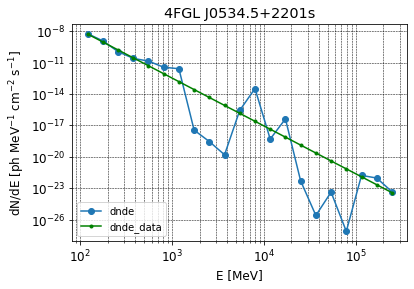

In [168]:
plt.loglog(xerror2201s, sedyerror2201s,"o-",label='dnde')
plt.loglog(xerror2201s, powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='lower left',fontsize=10)
plt.show()

In [169]:
#dnde+uldnde_95
error2201s = np.append(sed2201s['dnde_err'][:-14],0.2*sed2201s['dnde_ul95'][-14:])
Chi_Square = ((yerror2201s- powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s))/error2201s)**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-3)
print('Chi_Square_dnde+uldnde_95 =' ,Chi_Square)
print('sum_Chi_Square =',sum_Chi_Square)
print('reduced_Chi_Square_dnde+uldnde_95 =', reduced_Chi_Square)
#dnde_data
Chi_Square = ((sed2201s['dnde'] - powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s))/sed2201s['dnde_err'])**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-3)
print('Chi_Square_dnde_data =' ,Chi_Square)
print('sum_Chi_Square_dnde_data =',sum_Chi_Square)
print('reduced_Chi_Square_dnde_data =', reduced_Chi_Square)

Chi_Square_dnde+uldnde_95 = [30.36076084 52.59825564 10.30412982  0.16534421  5.90388469  2.20466277
  6.89622056 20.52194715 23.42970835 24.66430499 24.93765739 24.98638788
 24.99235234 24.99828008 24.99912363 24.99970816 24.99986093 24.99996698
 24.9999918  24.99999864 24.99999928]
sum_Chi_Square = 451.962546112585
reduced_Chi_Square_dnde+uldnde_95 = 25.109030339588056
Chi_Square_dnde_data = [3.03607608e+01 5.25982556e+01 1.03041298e+01 1.65344208e-01
 5.90388469e+00 2.20466277e+00 6.89622056e+00 5.50683358e-02
 6.38668152e-03 2.27668302e-04 3.90387756e-06 8.64832126e-01
 5.32996221e-08 1.84340945e-05 9.40893312e-10 1.06992261e-10
 3.71237252e-11 1.60168047e-12 9.50129058e-15 8.42349438e-14
 3.61081495e-17]
sum_Chi_Square_dnde_data = 109.35979571869728
reduced_Chi_Square_dnde_data = 6.0755442065942935


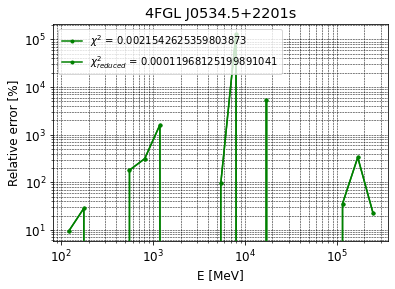

In [170]:
chi2201s = chisquare(yerror2201s, f_exp= sedyerror2201s)
rechi2201s = chi2201s[0]/(21-3)

plt.plot(xerror2201s,(sedyerror2201s-powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s))*100/(powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s)),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2201s[0]))
plt.plot(xerror2201s,(sedyerror2201s-powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s))*100/(powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s)),'g.-',  
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2201s))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='upper left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

In [171]:
Prefactor2201s = 2.88*1e-07
Index2201s = 4.57
Scale2201s = 50.5

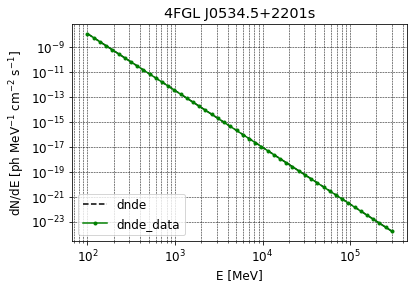

In [172]:

plt.loglog(E, dnde, 'k--',label ='dnde')

plt.loglog(E, powerlaw(Prefactor2201s,-Index2201s,Scale2201s,E),'g.-', label='dnde_data')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='lower left')
plt.show()

4FGL J0544.4+2238

In [173]:
Prefactor2238=1.45*1e-13
Index2238=-3.12
Scale2238=1.68e+03

In [174]:
E = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde'])


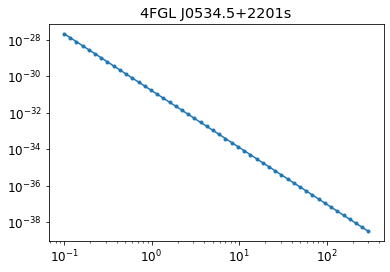

In [175]:
plt.loglog(E/1e3, powerlaw(Prefactor2238,Index2238,Scale2238,E/1e3)*1e-28,'.-', label='dnde_data')
plt.title('4FGL J0534.5+2201s')
plt.show()

In [176]:
sed2238 = gta.sed('4FGL J0544.4+2238')

2022-05-03 15:03:09 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0544.4+2238
2022-05-03 15:03:20 INFO    GTAnalysis._make_sed(): Fitting SED
2022-05-03 15:03:20 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2200     : ['Index1', 'Expfactor']
2022-05-03 15:03:20 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201s    : ['Index']
2022-05-03 15:03:20 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-05-03 15:03:20 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0526.3+2246     : ['Index']
2022-05-03 15:03:20 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0544.4+2238     : ['Index']
2022-05-03 15:03:33 INFO    GTAnalysis.sed(): Finished SED
2022-05-03 15:03:42 INFO    GTAnalysis.sed(): Execution time: 33.07 s


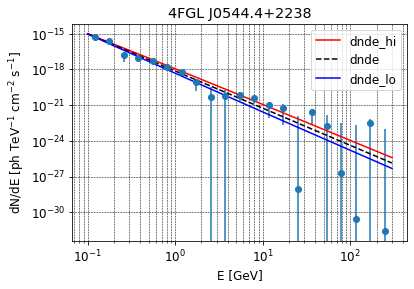

In [177]:
plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2238['e_ctr']*1e-3),
             sed2238['dnde']*1e-6, 
             yerr=sed2238['dnde_err']*1e-6, fmt ='o')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

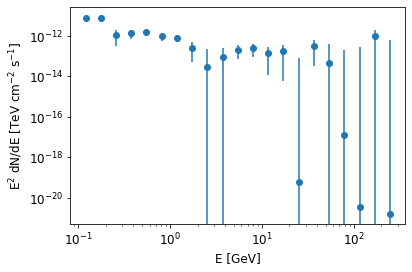

In [178]:
plt.errorbar(np.array(sed2238['e_ctr']*1e-3),
             sed2238['e2dnde']*1e-6, 
             yerr=sed2238['e2dnde_err']*1e-6, fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

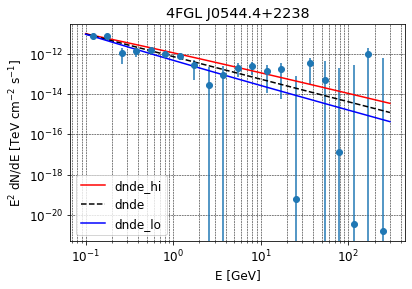

In [179]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2238['e_ctr']*1e-3),
             sed2238['e2dnde']*1e-6, 
             yerr=sed2238['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower left')
plt.show()

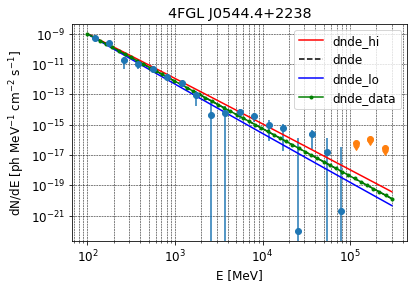

In [180]:

plt.loglog(E, dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, powerlaw(Prefactor2238,Index2238,Scale2238,E),'g.-', label='dnde_data')
plt.errorbar(sed2238['e_ctr'][:-3],
             1*sed2238['dnde'][:-3], 
             yerr=sed2238['dnde_err'][:-3], fmt ='o')
plt.errorbar(np.array(sed2238['e_ctr'][-3:]),
         sed2238['dnde_ul95'][-3:], yerr=0.2*sed2238['dnde_ul95'][-3:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

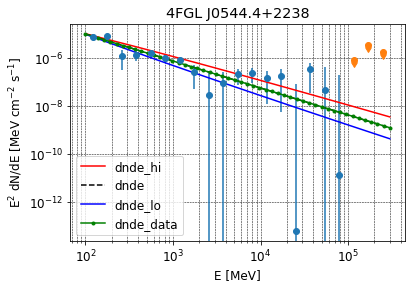

In [181]:
plt.loglog(E, (E**2)*dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, (E**2)*dnde, 'k--',label ='dnde')
plt.loglog(E, (E**2)*dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, (E**2)*powerlaw(Prefactor2238,Index2238,Scale2238,E),'g.-', label='dnde_data')
plt.errorbar(sed2238['e_ctr'][:-3],
             1*sed2238['e2dnde'][:-3], 
             yerr=sed2238['e2dnde_err'][:-3], fmt ='o')
plt.errorbar(np.array(sed2238['e_ctr'][-3:]),
         sed2238['e2dnde_ul95'][-3:], yerr=0.2*sed2238['e2dnde_ul95'][-3:], 
             fmt='o', uplims=True)

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^2$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower left')
plt.show()

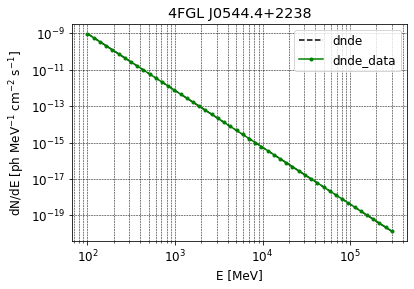

In [182]:
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, powerlaw(Prefactor2238,Index2238,Scale2238,E),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='upper right')
plt.show()
plt.show()

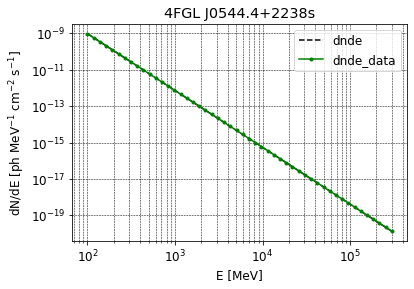

In [183]:
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, powerlaw(Prefactor2238,Index2238,Scale2238,E),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238s')
plt.legend(loc='upper right')
plt.show()
plt.show()

In [184]:
a = chisquare(dnde, f_exp=(powerlaw(Prefactor2238,-Index2238,Scale2238,E)))

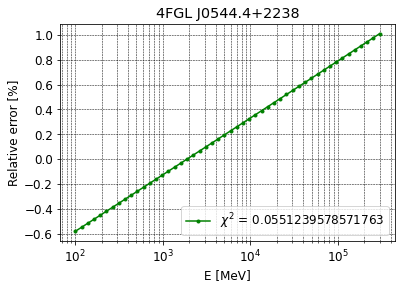

In [185]:
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,((powerlaw(Prefactor2238,Index2238,Scale2238,E)) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(a[0]))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.xscale('log')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower right')
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

No handles with labels found to put in legend.


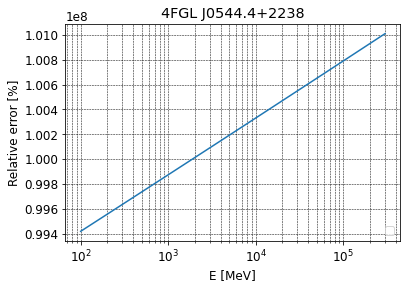

In [186]:
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,((powerlaw(Prefactor2238,Index2238,Scale2238,E) - (dnde*1e-6))*100/(dnde*1e-6))),'g.-', 
label=r'$\chi^{2}$ = %a' %float(a[0])
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.xscale('log')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower right')
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

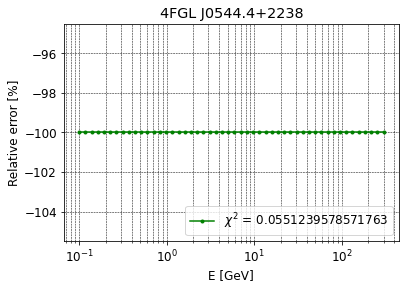

In [187]:
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E/1e3,((powerlaw(Prefactor2238,-Index2238,Scale2238,E/1e3)*1e-28) - (dnde*1e-6))*100/(dnde*1e-6),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(a[0]))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.xscale('log')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower right')
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

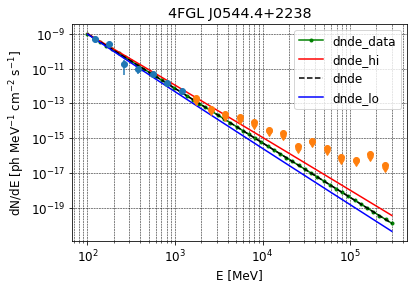

In [188]:
plt.loglog(E, powerlaw(Prefactor2238,Index2238,Scale2238,E),'g.-', label='dnde_data')
plt.loglog(E, dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
plt.errorbar(sed2238['e_ctr'][:-14],
             1*sed2238['dnde'][:-14], 
             yerr=sed2238['dnde_err'][:-14], fmt ='o')
plt.errorbar(np.array(sed2238['e_ctr'][-14:]),
         sed2238['dnde_ul95'][-14:], yerr=0.2*sed2238['dnde_ul95'][-14:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

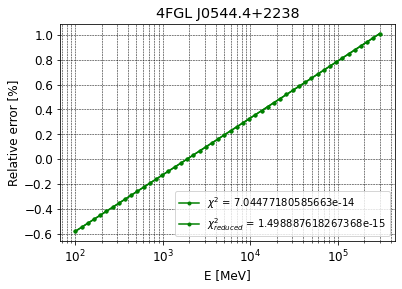

In [189]:
chi2238 = chisquare(dnde, f_exp=(powerlaw(Prefactor2238,Index2238,Scale2238,E)))
rechi2238 = chi2238[0]/(50-3)
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,(powerlaw(Prefactor2238,Index2238,Scale2238,E) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2238[0]))
plt.plot(E,(powerlaw(Prefactor2238,Index2238,Scale2238,E) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2238))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower right',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

In [190]:
chi2238

Power_divergenceResult(statistic=7.04477180585663e-14, pvalue=1.0)

In [191]:
rechi2238

1.498887618267368e-15

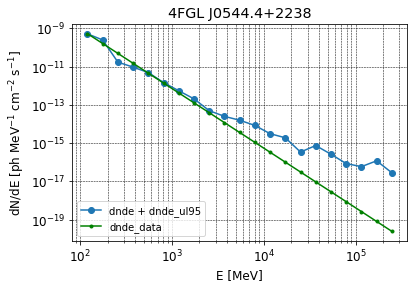

In [192]:
xerror2238 = np.append(sed2238['e_ctr'][:-14],sed2238['e_ctr'][-14:])
yerror2238 = np.append(sed2238['dnde'][:-14],sed2238['dnde_ul95'][-14:])
sedyerror2238 = sed2238['dnde']
plt.loglog(xerror2238, yerror2238,"o-",label='dnde + dnde_ul95')
plt.loglog(xerror2238, powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower left',fontsize=10)
plt.show()

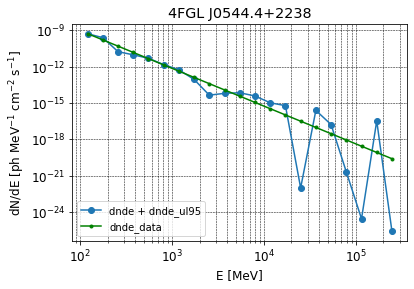

In [193]:
xerror2238 = np.append(sed2238['e_ctr'][:-14],sed2238['e_ctr'][-14:])
yerror2238 = np.append(sed2238['dnde'][:-14],sed2238['dnde_ul95'][-14:])
sedyerror2238 = sed2238['dnde']
plt.loglog(xerror2238, sed2238['dnde'],"o-",label='dnde + dnde_ul95')
plt.loglog(xerror2238, powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower left',fontsize=10)
plt.show()

In [194]:
#dnde+uldnde_95
error2238 = np.append(sed2238['dnde_err'][:-14],0.2*sed2238['dnde_ul95'][-14:])
Chi_Square = ((yerror2238- powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238))/error2238)**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-3)
print('Chi_Square_dnde+uldnde_95 =' ,Chi_Square)
print('sum_Chi_Square =',sum_Chi_Square)
print('reduced_Chi_Square_dnde+uldnde_95 =', reduced_Chi_Square)
#dnde_data
Chi_Square = ((sed2238['dnde'] - powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238))/sed2238['dnde_err'])**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-3)
print('Chi_Square_dnde_data =' ,Chi_Square)
print('sum_Chi_Square_dnde_data =',sum_Chi_Square)
print('reduced_Chi_Square_dnde_data =', reduced_Chi_Square)

Chi_Square_dnde+uldnde_95 = [1.00729430e-02 5.84766836e+00 6.39621162e+00 1.48634767e+00
 4.58657808e-02 2.08563816e-02 3.83137265e-01 3.58716515e+00
 1.21085103e+00 6.95709860e+00 1.48835019e+01 1.88967615e+01
 1.99329195e+01 2.24009960e+01 2.06837340e+01 2.43755398e+01
 2.44584384e+01 2.44927939e+01 2.47755899e+01 2.49660674e+01
 2.49565686e+01]
sum_Chi_Square = 270.768185719859
reduced_Chi_Square_dnde+uldnde_95 = 15.04267698443661
Chi_Square_dnde_data = [1.00729430e-02 5.84766836e+00 6.39621162e+00 1.48634767e+00
 4.58657808e-02 2.08563816e-02 3.83137265e-01 3.48996900e-01
 1.38171611e+00 2.59215559e-01 5.28310958e-01 1.30161241e+00
 5.37467736e-01 7.33835391e-01 5.89348359e-02 1.13762184e+00
 1.09920190e-02 7.57443775e-04 1.48090519e-04 9.74726439e-01
 5.52415681e-06]
sum_Chi_Square_dnde_data = 21.464501286123383
reduced_Chi_Square_dnde_data = 1.1924722936735213


In [195]:
(yerror2238-(powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238)))*100/( powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238))

array([-1.88163897e+00,  5.34219400e+01, -6.50274787e+01, -3.69484630e+01,
        7.58204356e+00,  5.89983904e+00,  3.01213752e+01,  6.09777814e+01,
        2.82178435e+01,  1.11651970e+02,  3.37795475e+02,  6.65744324e+02,
        8.33933247e+02,  1.77244214e+03,  1.00604134e+03,  7.85659984e+03,
        9.08228576e+03,  9.70766997e+03,  2.21305207e+04,  1.47200921e+05,
        1.14974108e+05])

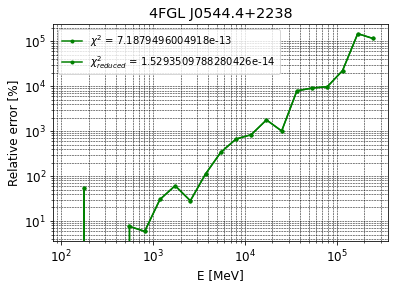

In [196]:
chi2238 = chisquare(yerror2238, f_exp=  powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238))
rechi2238 = chi2238[0]/(21-3)
plt.plot(xerror2238,(yerror2238-(powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238)))*100/( powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238)),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2246[0]))
plt.plot(xerror2238,(yerror2238-(powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238)))*100/( powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238)),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2246))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='upper left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

In [73]:
E = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['energies'])
dnde_hi2200 = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_hi'])
dnde_lo2200 = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_lo'])
dnde2200 = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde'])

In [74]:
E = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['energies'])

dnde_hi2201i = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_hi'])
dnde_lo2201i = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_lo'])
dnde2201i = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde'])


In [75]:
E = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['energies'])
dnde_hi2201s = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_hi'])
dnde_lo2201s = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_lo'])
dnde2201s = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde'])


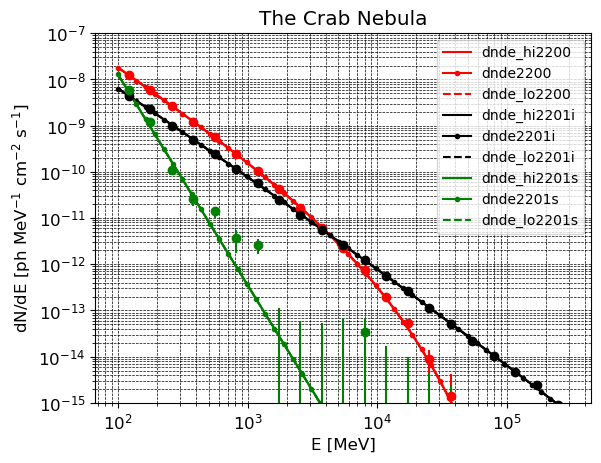

In [36]:
#2200
plt.loglog(E, dnde_hi2200, 'r-', label='dnde_hi2200')
plt.loglog(E, dnde_lo2200, 'r.-',label ='dnde2200')
plt.loglog(E, dnde2200, 'r--',label ='dnde_lo2200')
plt.errorbar(sed2200['e_ctr'],
             sed2200['dnde'], 
             yerr=sed2200['dnde_err'], fmt ='ro')
#2201i
plt.loglog(E, dnde_hi2201i , 'k-', label='dnde_hi2201i')
plt.loglog(E, dnde_hi2201i, 'k.-',label ='dnde2201i')
plt.loglog(E, dnde_hi2201i , 'k--',label ='dnde_lo2201i')
plt.errorbar(sed2201i['e_ctr'],
             sed2201i['dnde'], 
             yerr=sed2201i['dnde_err'], fmt ='ko')
#2201s
plt.loglog(E, dnde_hi2201s, 'g-', label='dnde_hi2201s')
plt.loglog(E, dnde_hi2201s, 'g.-',label ='dnde2201s')
plt.loglog(E, dnde_hi2201s , 'g--',label ='dnde_lo2201s')
plt.errorbar(sed2201s['e_ctr'],
             1*sed2201s['dnde'], 
             yerr=sed2201s['dnde_err'], fmt ='go')

plt.ylim(1e-15,1e-7)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('The Crab Nebula')
plt.legend(loc='upper right',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

In [ ]:
*E**2*erg

In [37]:
erg = 1.60218e-6

In [40]:
len(E)

50

In [41]:
len(sed2200['e_ctr'])

21

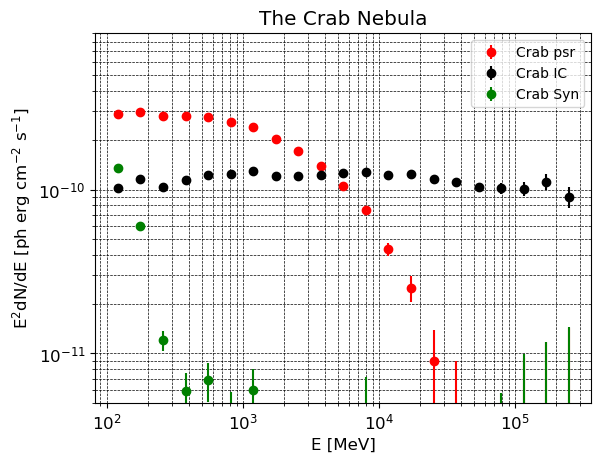

In [46]:
#2200
#plt.loglog(E, dnde_hi2200*E**2*erg, 'r-')#, label='dnde_hi2200')
#plt.loglog(E, dnde_lo2200*E**2*erg, 'r.-')#,label ='dnde2200')
#plt.loglog(E, dnde2200*E**2*erg, 'r--')#,label ='dnde_lo2200')
plt.errorbar(sed2200['e_ctr'],
             sed2200['dnde']*sed2200['e_ctr']**2*erg, 
             yerr=sed2200['dnde_err']*sed2200['e_ctr']**2*erg,label = "Crab psr", fmt ='ro')
#2201i
#plt.loglog(E, dnde_hi2201i , 'k-')#, label='dnde_hi2201i')
#plt.loglog(E, dnde_hi2201i*E**2*erg, 'k.-')#,label ='dnde2201i')
#plt.loglog(E, dnde_hi2201i*E**2*erg , 'k--')#,label ='dnde_lo2201i')
plt.errorbar(sed2201i['e_ctr'],
             sed2201i['dnde']*sed2200['e_ctr']**2*erg, 
             yerr=sed2201i['dnde_err']*sed2200['e_ctr']**2*erg,label = "Crab IC", fmt ='ko')
#2201s
#plt.loglog(E, dnde_hi2201s*E**2*erg, 'g-')#, label='dnde_hi2201s')
#plt.loglog(E, dnde_hi2201s*E**2*erg, 'g.-')#,label ='dnde2201s')
#plt.loglog(E, dnde_hi2201*E**2*ergs , 'g--')#,label ='dnde_lo2201s')
plt.errorbar(sed2201s['e_ctr'],
             sed2201s['dnde']*sed2200['e_ctr']**2*erg, 
             yerr=sed2201s['dnde_err']*sed2200['e_ctr']**2*erg,label = "Crab Syn", fmt ='go')
plt.yscale("log")
plt.xscale("log")
plt.ylim(5e-12,9e-10)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$dN/dE [ph erg cm$^{-2}$ s$^{-1}$]')
plt.title('The Crab Nebula')
plt.legend(loc='upper right',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

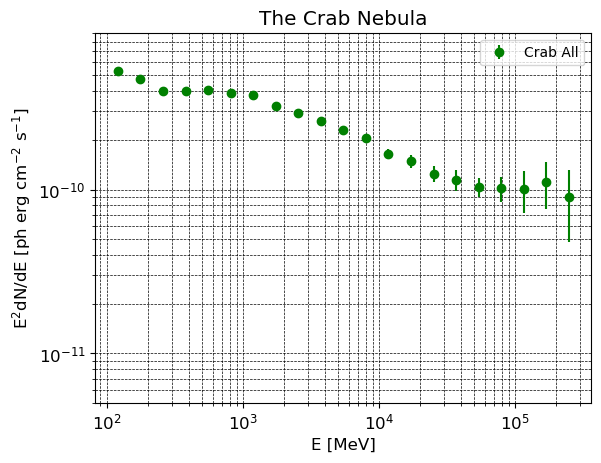

In [58]:
#2200
#plt.loglog(E, dnde_hi2200*E**2*erg, 'r-')#, label='dnde_hi2200')
#plt.loglog(E, dnde_lo2200*E**2*erg, 'r.-')#,label ='dnde2200')
#plt.loglog(E, dnde2200*E**2*erg, 'r--')#,label ='dnde_lo2200')
#plt.errorbar(sed2200['e_ctr'],
              
#             yerr=,label = "Crab psr", fmt ='ro')
#2201i
#plt.loglog(E, dnde_hi2201i , 'k-')#, label='dnde_hi2201i')
#plt.loglog(E, dnde_hi2201i*E**2*erg, 'k.-')#,label ='dnde2201i')
#plt.loglog(E, dnde_hi2201i*E**2*erg , 'k--')#,label ='dnde_lo2201i')
#plt.errorbar(sed2201i['e_ctr'],
#             , 
#             yerr=,label = "Crab IC", fmt ='ko')
#2201s
#plt.loglog(E, dnde_hi2201s*E**2*erg, 'g-')#, label='dnde_hi2201s')
#plt.loglog(E, dnde_hi2201s*E**2*erg, 'g.-')#,label ='dnde2201s')
#plt.loglog(E, dnde_hi2201*E**2*ergs , 'g--')#,label ='dnde_lo2201s')
plt.errorbar(sed2201s['e_ctr'],
             sed2201s['dnde']*sed2200['e_ctr']**2*erg +sed2200['dnde']*sed2200['e_ctr']**2*erg + sed2201i['dnde']*sed2200['e_ctr']**2*erg, 
             yerr=sed2201s['dnde_err']*sed2200['e_ctr']**2*erg+sed2200['dnde_err']*sed2200['e_ctr']**2*erg + sed2201i['dnde_err']*sed2200['e_ctr']**2*erg,label = "Crab All", fmt ='go')
plt.yscale("log")
plt.xscale("log")
plt.ylim(5e-12,9e-10)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$dN/dE [ph erg cm$^{-2}$ s$^{-1}$]')
plt.title('The Crab Nebula')
plt.legend(loc='upper right',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

In [50]:
E = sed2201s['e_ctr']

In [51]:
flux = sed2201s['dnde']*sed2200['e_ctr']**2*erg +sed2200['dnde']*sed2200['e_ctr']**2*erg + sed2201i['dnde']*sed2200['e_ctr']**2*erg

In [54]:
flux_Nebula =  sed2201s['dnde']*sed2200['e_ctr']**2*erg + sed2201i['dnde']*sed2200['e_ctr']**2*erg

In [52]:
flux_error = sed2201s['dnde_err']*sed2200['e_ctr']**2*erg+sed2200['dnde_err']*sed2200['e_ctr']**2*erg + sed2201i['dnde_err']*sed2200['e_ctr']**2*erg

In [53]:
flux_Nebula_error = sed2201s['dnde_err']*sed2200['e_ctr']**2*erg+sed2201i['dnde_err']*sed2200['e_ctr']**2*erg

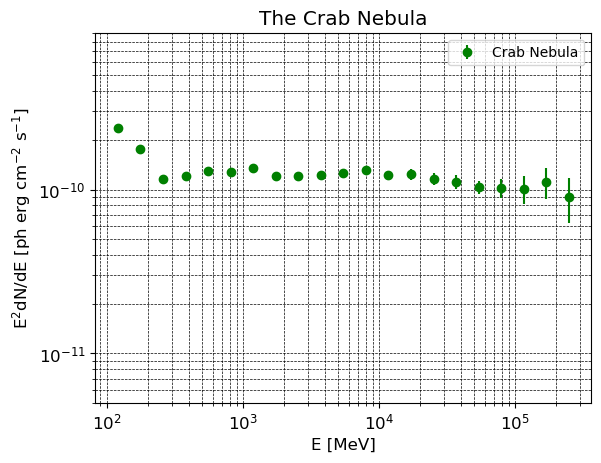

In [56]:
#2200
#plt.loglog(E, dnde_hi2200*E**2*erg, 'r-')#, label='dnde_hi2200')
#plt.loglog(E, dnde_lo2200*E**2*erg, 'r.-')#,label ='dnde2200')
#plt.loglog(E, dnde2200*E**2*erg, 'r--')#,label ='dnde_lo2200')
#plt.errorbar(sed2200['e_ctr'],
              
#             yerr=,label = "Crab psr", fmt ='ro')
#2201i
#plt.loglog(E, dnde_hi2201i , 'k-')#, label='dnde_hi2201i')
#plt.loglog(E, dnde_hi2201i*E**2*erg, 'k.-')#,label ='dnde2201i')
#plt.loglog(E, dnde_hi2201i*E**2*erg , 'k--')#,label ='dnde_lo2201i')
#plt.errorbar(sed2201i['e_ctr'],
#             , 
#             yerr=,label = "Crab IC", fmt ='ko')
#2201s
#plt.loglog(E, dnde_hi2201s*E**2*erg, 'g-')#, label='dnde_hi2201s')
#plt.loglog(E, dnde_hi2201s*E**2*erg, 'g.-')#,label ='dnde2201s')
#plt.loglog(E, dnde_hi2201*E**2*ergs , 'g--')#,label ='dnde_lo2201s')
plt.errorbar(E,
             flux_Nebula , 
             yerr=flux_Nebula_error,label = "Crab Nebula", fmt ='go')
plt.yscale("log")
plt.xscale("log")
plt.ylim(5e-12,9e-10)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$dN/dE [ph erg cm$^{-2}$ s$^{-1}$]')
plt.title('The Crab Nebula')
plt.legend(loc='upper right',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

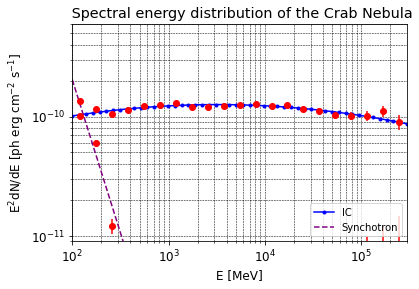

In [251]:
#2200
#plt.loglog(E, dnde_hi2200*E**2*1.6*1e-6, 'r-' )
#plt.loglog(E, dnde_lo2200*E**2*1.6*1e-6, 'r.-',label ='dnde2200')
#plt.loglog(E, dnde2200*E**2*1.6*1e-6, 'r--')
#plt.errorbar(sed2200['e_ctr'],
#             sed2200['e2dnde'], 
#             yerr=sed2200['e2dnde_err'], fmt ='ro')
#2201i
#plt.loglog(E, dnde_hi2201i*E**2*1.6*1e-6 , '--',color='purple')
plt.loglog(E, dnde2201i*E**2*1.6*1e-6, '.-',color='Blue',label ='IC')
#plt.loglog(E, dnde_hi2201i*E**2*1.6*1e-6 , '--',color='purple')
plt.errorbar(sed2201i['e_ctr'],
             sed2201i['e2dnde']*1.6*1e-6, 
             yerr=sed2201i['e2dnde_err']*1.6*1e-6, fmt ='ro')
#2201s
#plt.loglog(E, dnde_hi2201s*E**2*1.6*1e-6, 'g-')
plt.loglog(E, dnde2201s*E**2*1.6*1e-6, '--',color='purple',label ='Synchotron')
#plt.loglog(E, dnde_hi2201s*E**2*1.6*1e-6 , 'g--')
plt.errorbar(sed2201s['e_ctr'],
             1*sed2201s['e2dnde']*1.6*1e-6, 
             yerr=sed2201s['e2dnde_err']*1.6*1e-6, fmt ='ro')

plt.ylim(9e-12,6e-10)
plt.xlim(1e2,3e5)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$dN/dE [ph erg cm$^{-2}$ s$^{-1}$]')
plt.title(' Spectral energy distribution of the Crab Nebula')
plt.legend(loc='lower right',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

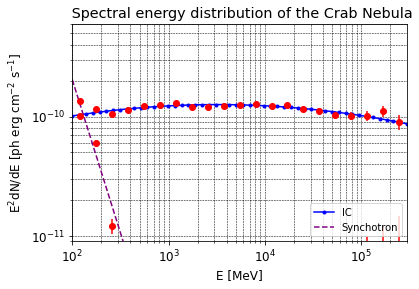

In [251]:
#2200
#plt.loglog(E, dnde_hi2200*E**2*1.6*1e-6, 'r-' )
#plt.loglog(E, dnde_lo2200*E**2*1.6*1e-6, 'r.-',label ='dnde2200')
#plt.loglog(E, dnde2200*E**2*1.6*1e-6, 'r--')
#plt.errorbar(sed2200['e_ctr'],
#             sed2200['e2dnde'], 
#             yerr=sed2200['e2dnde_err'], fmt ='ro')
#2201i
#plt.loglog(E, dnde_hi2201i*E**2*1.6*1e-6 , '--',color='purple')
plt.loglog(E, dnde2201i*E**2*1.6*1e-6, '.-',color='Blue',label ='IC')
#plt.loglog(E, dnde_hi2201i*E**2*1.6*1e-6 , '--',color='purple')
plt.errorbar(sed2201i['e_ctr'],
             sed2201i['e2dnde']*1.6*1e-6, 
             yerr=sed2201i['e2dnde_err']*1.6*1e-6, fmt ='ro')
#2201s
#plt.loglog(E, dnde_hi2201s*E**2*1.6*1e-6, 'g-')
plt.loglog(E, dnde2201s*E**2*1.6*1e-6, '--',color='purple',label ='Synchotron')
#plt.loglog(E, dnde_hi2201s*E**2*1.6*1e-6 , 'g--')
plt.errorbar(sed2201s['e_ctr'],
             1*sed2201s['e2dnde']*1.6*1e-6, 
             yerr=sed2201s['e2dnde_err']*1.6*1e-6, fmt ='ro')

plt.ylim(9e-12,6e-10)
plt.xlim(1e2,3e5)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$dN/dE [ph erg cm$^{-2}$ s$^{-1}$]')
plt.title(' Spectral energy distribution of the Crab Nebula')
plt.legend(loc='lower right',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

# Save

In [64]:
erg = 1.60218e-6

In [97]:
#Syn
energy_Syn = sed2201s['e_ctr']
energy_Syn
flux_Syn = sed2201s['e2dnde']*erg
flux_Syn
flux_error_lo_Syn = sed2201s['e2dnde_err_lo']*erg
flux_error_lo_Syn
flux_error_hi_Syn = sed2201s['e2dnde_err_hi']*erg
flux_error_hi_Syn
flux_error_Syn = sed2201s['e2dnde_err']*erg
flux_error_Syn

array([2.10405157e-12, 1.82506423e-12, 1.71151096e-12, 1.74629153e-12,
       1.82575462e-12, 1.95503674e-12, 2.13231790e-12, 5.57355568e-13,
       6.14398043e-13, 1.22159433e-12, 3.33789507e-12, 3.69942789e-12,
       3.73946992e-12, 4.63153848e-12, 4.47685782e-12, 4.98531073e-12,
       3.17364897e-12, 5.74149479e-12, 9.94362774e-12, 1.17844716e-11,
       1.45502888e-11])

In [98]:
flux_error_lo_Syn

array([2.09836122e-12, 1.81910606e-12, 1.70951616e-12, 1.74629153e-12,
       1.82575462e-12, 1.95503674e-12, 2.13231790e-12,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan, 1.17774959e-11,
                  nan])

In [99]:
flux_error_lo_Syn[np.isnan(flux_error_lo_Syn)] = 0
flux_error_lo_Syn

array([2.09836122e-12, 1.81910606e-12, 1.70951616e-12, 1.74629153e-12,
       1.82575462e-12, 1.95503674e-12, 2.13231790e-12, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.17774959e-11,
       0.00000000e+00])

In [100]:
#IC
energy_IC = sed2201i['e_ctr']
energy_IC
flux_IC = sed2201i['e2dnde']*erg
flux_IC
flux_error_lo_IC = sed2201i['e2dnde_err_lo']*erg
flux_error_lo_IC
flux_error_hi_IC = sed2201i['e2dnde_err_hi']*erg
flux_error_hi_IC
flux_error_IC = sed2201i['e2dnde_err']*erg
flux_error_IC

array([2.10949812e-12, 1.82765096e-12, 1.72104114e-12, 1.75312063e-12,
       1.83984437e-12, 1.96636563e-12, 2.15249262e-12, 2.34402410e-12,
       2.62383120e-12, 2.94584246e-12, 3.28763221e-12, 3.67038065e-12,
       3.98354074e-12, 4.49315039e-12, 5.00996046e-12, 5.69658986e-12,
       6.51901033e-12, 7.82925242e-12, 9.44306905e-12, 1.20520746e-11,
       1.31406599e-11])

In [101]:
flux_error_lo_IC

array([2.10624951e-12, 1.82257605e-12, 1.71625516e-12, 1.74968635e-12,
       1.83921650e-12, 1.96776429e-12, 2.15712797e-12, 2.34907759e-12,
       2.62826745e-12, 2.94439169e-12, 3.26968079e-12, 3.65222495e-12,
       3.93520347e-12, 4.41094681e-12, 4.90205127e-12, 5.54474661e-12,
       6.30993083e-12, 7.54432090e-12, 9.05179756e-12, 1.14953050e-11,
       1.23481610e-11])

In [102]:
#IC
energy = energy_IC
energy
flux = flux_IC+flux_Syn
flux
flux_error_lo = flux_error_lo_IC +flux_error_lo_Syn
flux_error_lo
flux_error_hi = flux_error_hi_IC +flux_error_hi_Syn
flux_error_hi
flux_error  = flux_error_IC + flux_error_Syn
flux_error

array([4.21354969e-12, 3.65271519e-12, 3.43255211e-12, 3.49941216e-12,
       3.66559899e-12, 3.92140236e-12, 4.28481051e-12, 2.90137966e-12,
       3.23822925e-12, 4.16743679e-12, 6.62552727e-12, 7.36980854e-12,
       7.72301066e-12, 9.12468887e-12, 9.48681828e-12, 1.06819006e-11,
       9.69265930e-12, 1.35707472e-11, 1.93866968e-11, 2.38365462e-11,
       2.76909487e-11])

In [103]:
energy

array([1.21001290e+02, 1.77159726e+02, 2.59382099e+02, 3.79769428e+02,
       5.56032274e+02, 8.14094836e+02, 1.19192794e+03, 1.74513890e+03,
       2.55508293e+03, 3.74093360e+03, 5.47721766e+03, 8.01936536e+03,
       1.17412680e+04, 1.71905590e+04, 2.51692341e+04, 3.68510613e+04,
       5.39541680e+04, 7.89950721e+04, 1.15659151e+05, 1.69338224e+05,
       2.47930525e+05])

In [104]:
flux

array([2.38204469e-10, 1.75905910e-10, 1.16453540e-10, 1.20353426e-10,
       1.30244868e-10, 1.28418502e-10, 1.35343907e-10, 1.20416084e-10,
       1.20692947e-10, 1.23226390e-10, 1.25874744e-10, 1.31709826e-10,
       1.22452762e-10, 1.24007468e-10, 1.16112030e-10, 1.11844757e-10,
       1.03895175e-10, 1.01976237e-10, 1.01106756e-10, 1.11655088e-10,
       8.98848054e-11])

In [105]:
flux_error_lo

array([4.20461074e-12, 3.64168211e-12, 3.42577132e-12, 3.49597788e-12,
       3.66497112e-12, 3.92280103e-12, 4.28944587e-12, 2.34907759e-12,
       2.62826745e-12, 2.94439169e-12, 3.26968079e-12, 3.65222495e-12,
       3.93520347e-12, 4.41094681e-12, 4.90205127e-12, 5.54474661e-12,
       6.30993083e-12, 7.54432090e-12, 9.05179756e-12, 2.32728009e-11,
       1.23481610e-11])

In [106]:
flux_error_hi

array([4.22248864e-12, 3.66374827e-12, 3.43933290e-12, 3.50284644e-12,
       3.66622685e-12, 3.92000370e-12, 4.28017516e-12, 2.89632618e-12,
       3.23379300e-12, 4.16888756e-12, 6.64347869e-12, 7.38796424e-12,
       7.77134793e-12, 9.20689246e-12, 9.59472747e-12, 1.08337438e-11,
       9.90173880e-12, 1.38556787e-11, 1.97779683e-11, 2.44002914e-11,
       2.84834476e-11])

In [107]:
flux_error

array([4.21354969e-12, 3.65271519e-12, 3.43255211e-12, 3.49941216e-12,
       3.66559899e-12, 3.92140236e-12, 4.28481051e-12, 2.90137966e-12,
       3.23822925e-12, 4.16743679e-12, 6.62552727e-12, 7.36980854e-12,
       7.72301066e-12, 9.12468887e-12, 9.48681828e-12, 1.06819006e-11,
       9.69265930e-12, 1.35707472e-11, 1.93866968e-11, 2.38365462e-11,
       2.76909487e-11])

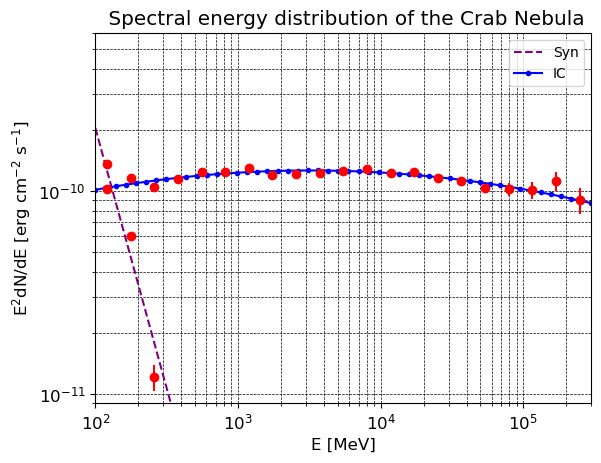

In [108]:
plt.loglog(E, dnde2201s*E**2*erg, '--',color='purple',label ='Syn')
plt.loglog(E, dnde2201i*E**2*erg, '.-',color='Blue',label ='IC')

plt.errorbar(energy,
             flux_IC, 
             yerr=flux_error_IC, fmt ='ro')

plt.errorbar(energy[:-5],
             flux_Syn[:-5], 
             yerr=flux_error_Syn[:-5], fmt ='ro')

plt.ylim(9e-12,6e-10)
plt.xlim(1e2,3e5)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$dN/dE [erg cm$^{-2}$ s$^{-1}$]')
plt.title(' Spectral energy distribution of the Crab Nebula')
plt.legend(loc='upper right',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

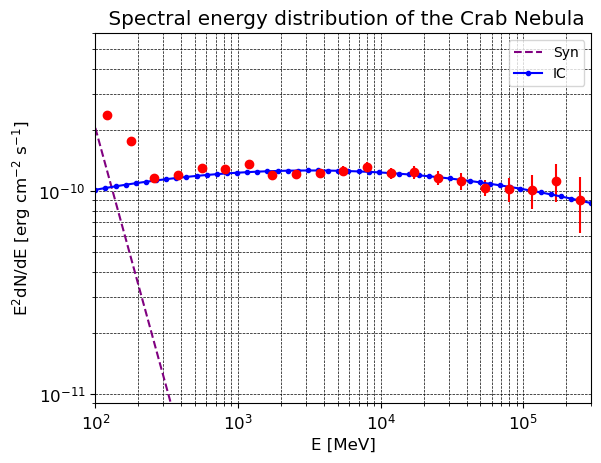

In [109]:
plt.loglog(E, dnde2201s*E**2*erg, '--',color='purple',label ='Syn')
plt.loglog(E, dnde2201i*E**2*erg, '.-',color='Blue',label ='IC')

plt.errorbar(energy,
             flux, 
             yerr=flux_error, fmt ='ro')

#plt.errorbar(energy[:-5],
#             flux_Syn[:-5], 
#             yerr=flux_error_Syn[:-5], fmt ='ro')

plt.ylim(9e-12,6e-10)
plt.xlim(1e2,3e5)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$dN/dE [erg cm$^{-2}$ s$^{-1}$]')
plt.title(' Spectral energy distribution of the Crab Nebula')
plt.legend(loc='upper right',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

In [128]:
data = ascii.read("~/naima/Project/Crab/Ado_Fermi_Crab.ecsv")

In [129]:
data

energy,flux,flux_error_lo,flux_error_hi,flux_error,component,paper,group
MeV,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),,,
float64,float64,float64,float64,float64,str6,str14,int64
111.287302689,2.9838e-10,3.352e-11,4.448e-11,3.9e-11,nebula,fermi_33months,3
147.111158779,2.3492e-10,2.636e-11,2.451e-11,2.5435e-11,nebula,fermi_33months,3
189.559527015,1.1717e-10,1.52e-11,1.482e-11,1.501e-11,nebula,fermi_33months,3
250.579545041,7.8707e-11,1.1557e-11,9.955e-12,1.0756e-11,nebula,fermi_33months,3
331.165903869,4.2498e-11,8.334e-12,7.318e-12,7.826e-12,nebula,fermi_33months,3
426.820840203,3.6227e-11,6.523e-12,7.954e-12,7.2385e-12,nebula,fermi_33months,3
550.105030449,3.9972e-11,7.196e-12,6.88e-12,7.038e-12,nebula,fermi_33months,3
727.018758063,3.2101e-11,6.296e-12,5.522e-12,5.909e-12,nebula,fermi_33months,3


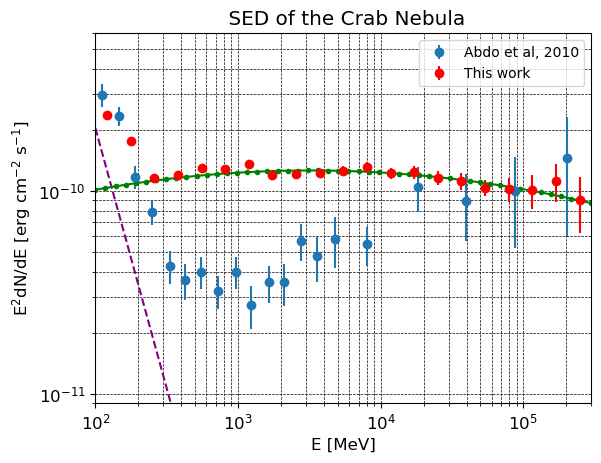

In [134]:
plt.loglog(E, dnde2201s*E**2*erg, '--',color='purple')
plt.loglog(E, dnde2201i*E**2*erg, '.-',color='green')

plt.errorbar(data["energy"],
             data["flux"], 
             yerr=data["flux_error"], fmt ='o',label ='Abdo et al, 2010')

plt.errorbar(energy,
             flux, 
             yerr=flux_error, fmt ='ro',label ='This work')

#plt.errorbar(energy[:-5],
#             flux_Syn[:-5], 
#             yerr=flux_error_Syn[:-5], fmt ='ro')

plt.ylim(9e-12,6e-10)
plt.xlim(1e2,3e5)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$dN/dE [erg cm$^{-2}$ s$^{-1}$]')
plt.title(' SED of the Crab Nebula')
plt.legend(loc='upper right',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

In [68]:
import numpy as np
from astropy.table import Table,vstack
from astropy import units as u
from astropy.table import MaskedColumn
from astropy.io import ascii
from astropy import constants as const

In [81]:
ul = []
for i in range(len(flux)):
    a = 0
    ul.append(a)
ul

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [82]:
component = []
for i in range(len(flux)):
    a = 'nebula'
    component.append(a)
component

['nebula',
 'nebula',
 'nebula',
 'nebula',
 'nebula',
 'nebula',
 'nebula',
 'nebula',
 'nebula',
 'nebula',
 'nebula',
 'nebula',
 'nebula',
 'nebula',
 'nebula',
 'nebula',
 'nebula',
 'nebula',
 'nebula',
 'nebula',
 'nebula']

In [83]:
paper = []
for i in range(len(flux)):
    a = 'Fermi-LAT'
    paper.append(a)
paper

['Fermi-LAT',
 'Fermi-LAT',
 'Fermi-LAT',
 'Fermi-LAT',
 'Fermi-LAT',
 'Fermi-LAT',
 'Fermi-LAT',
 'Fermi-LAT',
 'Fermi-LAT',
 'Fermi-LAT',
 'Fermi-LAT',
 'Fermi-LAT',
 'Fermi-LAT',
 'Fermi-LAT',
 'Fermi-LAT',
 'Fermi-LAT',
 'Fermi-LAT',
 'Fermi-LAT',
 'Fermi-LAT',
 'Fermi-LAT',
 'Fermi-LAT']

In [84]:
group = []
for i in range(len(flux)):
    a = 3
    group.append(a)
group

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [124]:
data = Table()

In [125]:
data['energy'] = MaskedColumn(energy, unit='MeV', dtype=np.float64)
data['flux'] = MaskedColumn(flux, unit="erg / (cm2 s)", dtype=np.float64)
data['flux_error_lo'] = MaskedColumn(flux_error_lo, unit="erg / (cm2 s)",dtype=np.float64)
data['flux_error_hi'] = MaskedColumn(flux_error_hi, unit="erg / (cm2 s)", dtype=np.float64)
#data['flux_error'] =  MaskedColumn(e2dnde_err, unit="erg / (cm2 s)", dtype=np.float64)
data['flux_error'] = MaskedColumn(flux_error, unit="erg / (cm2 s)", dtype=np.float64)
data['component'] = MaskedColumn(component, dtype=str)
data['paper'] = MaskedColumn(paper, dtype=str)
data['group'] = MaskedColumn(group, dtype=np.int64)

In [126]:
data.write('Fermi_Crab.ecsv', format='ascii.ecsv', overwrite=True) 

# Other

In [61]:
sed2201i['e_ctr']

array([1.21001290e+02, 1.77159726e+02, 2.59382099e+02, 3.79769428e+02,
       5.56032274e+02, 8.14094836e+02, 1.19192794e+03, 1.74513890e+03,
       2.55508293e+03, 3.74093360e+03, 5.47721766e+03, 8.01936536e+03,
       1.17412680e+04, 1.71905590e+04, 2.51692341e+04, 3.68510613e+04,
       5.39541680e+04, 7.89950721e+04, 1.15659151e+05, 1.69338224e+05,
       2.47930525e+05])

In [ ]:
#2200
#plt.loglog(E, 1.6*dnde_hi2200*E**2*1e-6, 'k-' )
#plt.loglog(E, 1.6*dnde_lo2200*E**2*1e-6, 'k.-')
plt.loglog(E, 1.6*dnde2200*E**2*1e-6, '-',color='black')
plt.errorbar(sed2200['e_ctr'],
             1.6*sed2200['e2dnde']*1e-6, 
             yerr=1.6*sed2200['e2dnde_err']*1e-6, fmt ='ro')

plt.ylim(5e-12,9e-10)
plt.xlim(1e2,3e4)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$dN/dE [ph erg cm$^{-2}$ s$^{-1}$]')
plt.title('Crab Pulsar')
#plt.legend(loc='lower left',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

In [201]:
sed2200['e2dnde']

array([1.79861961e-04, 1.86066412e-04, 1.75042047e-04, 1.75357431e-04,
       1.72531028e-04, 1.61981789e-04, 1.50481204e-04, 1.27503590e-04,
       1.07628024e-04, 8.70925601e-05, 6.60194376e-05, 4.70577127e-05,
       2.69163973e-05, 1.57039557e-05, 5.59161492e-06, 1.88381622e-06,
       4.23787410e-10, 2.99933899e-12, 4.39805031e-09, 8.49014160e-09,
       1.16879663e-11])

In [202]:
sed2200['e2dnde_err'],

(array([1.32271232e-06, 1.14604952e-06, 1.07534503e-06, 1.08700199e-06,
        1.15026919e-06, 1.22719432e-06, 1.34091231e-06, 1.46108638e-06,
        1.62188424e-06, 1.83323985e-06, 2.06446430e-06, 2.29795912e-06,
        2.48579015e-06, 2.81256385e-06, 3.11275739e-06, 3.69750455e-06,
        2.48584316e-06, 2.50896612e-06, 5.88166106e-06, 7.32846253e-06,
        8.90636373e-06]),)

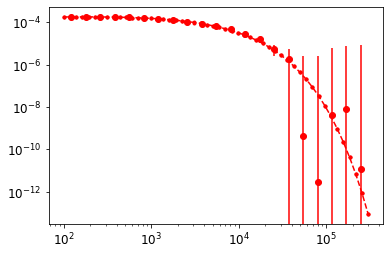

In [259]:
plt.loglog(E, dnde_hi2200*E**2, 'r.' )
plt.loglog(E, dnde_lo2200*E**2, 'r.')
plt.loglog(E, dnde2200*E**2, 'r--',label ='Crab Pulsar')
plt.errorbar(sed2200['e_ctr'],
             sed2200['e2dnde'], 
             yerr=sed2200['e2dnde_err'], fmt ='ro')
plt.show()

In [31]:
#2200
plt.loglog(E, dnde_hi2200*E**2, 'r.' )
plt.loglog(E, dnde_lo2200*E**2, 'r.')
plt.loglog(E, dnde2200*E**2, 'r--',label ='Crab Pulsar')
plt.errorbar(sed2200['e_ctr'],
             sed2200['e2dnde'], 
             yerr=sed2200['e2dnde_err'], fmt ='ro')
#2201i
plt.loglog(E, dnde_hi2201i*E**2 , 'k.')
plt.loglog(E, dnde_lo2201i*E**2, 'k.')
plt.loglog(E, dnde2201i*E**2 , 'k--',label ='IC')
plt.errorbar(sed2201i['e_ctr'],
             sed2201i['e2dnde'], 
             yerr=sed2201i['e2dnde_err'], fmt ='ko')
#2201s
plt.loglog(E, dnde_hi2201s*E**2, 'g.')
plt.loglog(E, dnde_lo2201s*E**2, 'g.')
plt.loglog(E, dnde2201s*E**2 , 'g--',label ='Synchotron')
plt.errorbar(sed2201s['e_ctr'],
             1*sed2201s['e2dnde'], 
             yerr=sed2201s['e2dnde_err'], fmt ='go')

plt.ylim(1e-8,1e-3)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$dN/dE [ph MeV cm$^{-2}$ s$^{-1}$]')
plt.title('The Crab Nebula')
plt.legend(loc='lower left',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

NameError: name 'dnde_hi2200' is not defined

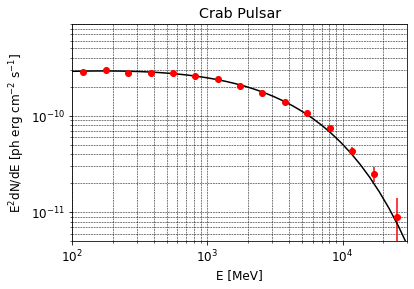

In [256]:
#2200
#plt.loglog(E, 1.6*dnde_hi2200*E**2*1e-6, 'k-' )
#plt.loglog(E, 1.6*dnde_lo2200*E**2*1e-6, 'k.-')
plt.loglog(E, 1.6*dnde2200*E**2*1e-6, '-',color='black')
plt.errorbar(sed2200['e_ctr'],
             1.6*sed2200['e2dnde']*1e-6, 
             yerr=1.6*sed2200['e2dnde_err']*1e-6, fmt ='ro')

plt.ylim(5e-12,9e-10)
plt.xlim(1e2,3e4)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$dN/dE [ph erg cm$^{-2}$ s$^{-1}$]')
plt.title('Crab Pulsar')
#plt.legend(loc='lower left',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

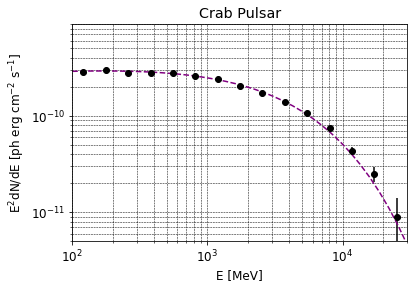

In [257]:
#2200
#plt.loglog(E, 1.6*dnde_hi2200*E**2*1e-6, 'purple','-')
#plt.loglog(E, 1.6*dnde_lo2200*E**2*1e-6, 'purple','.-')
plt.loglog(E, 1.6*dnde2200*E**2*1e-6,'--',color='purple' )
plt.errorbar(sed2200['e_ctr'],
             1.6*sed2200['e2dnde']*1e-6, 
             yerr=1.6*sed2200['e2dnde_err']*1e-6, fmt ='ko')

plt.ylim(5e-12,9e-10)
plt.xlim(1e2,3e4)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$dN/dE [ph erg cm$^{-2}$ s$^{-1}$]')
plt.title('Crab Pulsar')
#plt.legend(loc='lower left',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

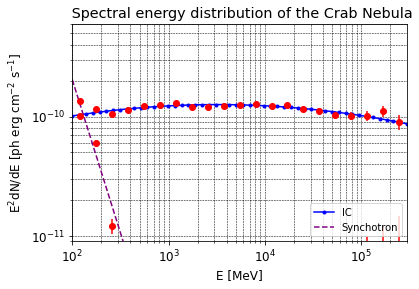

In [251]:
#2200
#plt.loglog(E, dnde_hi2200*E**2*1.6*1e-6, 'r-' )
#plt.loglog(E, dnde_lo2200*E**2*1.6*1e-6, 'r.-',label ='dnde2200')
#plt.loglog(E, dnde2200*E**2*1.6*1e-6, 'r--')
#plt.errorbar(sed2200['e_ctr'],
#             sed2200['e2dnde'], 
#             yerr=sed2200['e2dnde_err'], fmt ='ro')
#2201i
#plt.loglog(E, dnde_hi2201i*E**2*1.6*1e-6 , '--',color='purple')
plt.loglog(E, dnde2201i*E**2*1.6*1e-6, '.-',color='Blue',label ='IC')
#plt.loglog(E, dnde_hi2201i*E**2*1.6*1e-6 , '--',color='purple')
plt.errorbar(sed2201i['e_ctr'],
             sed2201i['e2dnde']*1.6*1e-6, 
             yerr=sed2201i['e2dnde_err']*1.6*1e-6, fmt ='ro')
#2201s
#plt.loglog(E, dnde_hi2201s*E**2*1.6*1e-6, 'g-')
plt.loglog(E, dnde2201s*E**2*1.6*1e-6, '--',color='purple',label ='Synchotron')
#plt.loglog(E, dnde_hi2201s*E**2*1.6*1e-6 , 'g--')
plt.errorbar(sed2201s['e_ctr'],
             1*sed2201s['e2dnde']*1.6*1e-6, 
             yerr=sed2201s['e2dnde_err']*1.6*1e-6, fmt ='ro')

plt.ylim(9e-12,6e-10)
plt.xlim(1e2,3e5)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$dN/dE [ph erg cm$^{-2}$ s$^{-1}$]')
plt.title(' Spectral energy distribution of the Crab Nebula')
plt.legend(loc='lower right',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")